# Project4 - Travel Package Purchase Prediction

## Problem statement

 * "Visit with us" wants to enable and establish a viable business model to expand the customer base.
 * The company is offering five types of travel packages, and only 18% of customers bought them last year.
 * The company is now planning to launch a new package, and wants to harness the available data of existing and potential customers to target the right customers.

## Objective

* Build a model to predict whether a customer will purchase a newly introduced travel package or not.
* Investigate which variables are most important.
* Investigate which customer segments you should target more.

## Data

**Tourism.xlsx ( sheet : Tourism )**

* ustomerID: Unique customer ID
* ProdTaken: Whether the customer has purchased a package or not (0: No, 1: Yes)
* Age: Age of customer
* TypeofContact: How customer was contacted (Company Invited or Self Inquiry)
* CityTier: City tier depends on the development of a city, population, facilities, and living standards. The categories are ordered i.e. Tier 1 > Tier 2 > Tier 3. It's the city the customer lives in.
* Occupation: Occupation of customer
* Gender: Gender of customer
* NumberOfPersonVisiting: Total number of persons planning to take the trip with the customer
* PreferredPropertyStar: Preferred hotel property rating by customer
* MaritalStatus: Marital status of customer
* NumberOfTrips: Average number of trips in a year by customer
* Passport: The customer has a passport or not (0: No, 1: Yes)
* OwnCar: Whether the customers own a car or not (0: No, 1: Yes)
* NumberOfChildrenVisiting: Total number of children with age less than 5 planning to take the trip with the customer
* Designation: Designation of the customer in the current organization
* MonthlyIncome: Gross monthly income of the customer

* PitchSatisfactionScore: Sales pitch satisfaction score
* ProductPitched: Product pitched by the salesperson
* NumberOfFollowups: Total number of follow-ups has been done by the salesperson after the sales pitch
* DurationOfPitch: Duration of the pitch by a salesperson to the customer

## Loading libraries

In [1]:
# Library to suppress warnings or deprecation notes 
import warnings
warnings.filterwarnings('ignore')

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Libraries to split data, impute missing values 
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

# Libraries to import decision tree classifier and different ensemble classifiers
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.tree import DecisionTreeClassifier

# Libtune to tune model, get different metric scores
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import GridSearchCV

## Loading and exploring the dataset

### Read the dataset.

In [2]:
raw_data = pd.read_excel(open('Tourism.xlsx', 'rb'),sheet_name='Tourism')

In [3]:
# copying data to another varaible to avoid any changes to original data
data = raw_data.copy()

In [4]:
# checking the shape of the data
data.shape

(4888, 20)

* The dataset has 4888 rows and 20 columns

### View the first, last and random 5 rows of the dataset.

In [5]:
data.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [6]:
data.tail()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
4883,204883,1,49.0,Self Enquiry,3,9.0,Small Business,Male,3,5.0,Deluxe,4.0,Unmarried,2.0,1,1,1,1.0,Manager,26576.0
4884,204884,1,28.0,Company Invited,1,31.0,Salaried,Male,4,5.0,Basic,3.0,Single,3.0,1,3,1,2.0,Executive,21212.0
4885,204885,1,52.0,Self Enquiry,3,17.0,Salaried,Female,4,4.0,Standard,4.0,Married,7.0,0,1,1,3.0,Senior Manager,31820.0
4886,204886,1,19.0,Self Enquiry,3,16.0,Small Business,Male,3,4.0,Basic,3.0,Single,3.0,0,5,0,2.0,Executive,20289.0
4887,204887,1,36.0,Self Enquiry,1,14.0,Salaried,Male,4,4.0,Basic,4.0,Unmarried,3.0,1,3,1,2.0,Executive,24041.0


In [7]:
data.sample(n=5, random_state=1)

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
3015,203015,0,27.0,Company Invited,1,7.0,Salaried,Female,4,6.0,Basic,3.0,Married,5.0,0,4,1,3.0,Executive,23042.0
1242,201242,0,40.0,Self Enquiry,3,13.0,Small Business,Male,2,3.0,King,4.0,Single,2.0,0,4,1,NaN,VP,34833.0
3073,203073,0,29.0,Self Enquiry,2,15.0,Small Business,Male,4,5.0,Basic,3.0,Married,3.0,0,2,0,2.0,Executive,23614.0
804,200804,0,48.0,Company Invited,1,6.0,Small Business,Male,2,1.0,Super Deluxe,3.0,Single,3.0,0,2,0,0.0,AVP,31885.0
3339,203339,0,32.0,Self Enquiry,1,18.0,Small Business,Male,4,4.0,Deluxe,5.0,Divorced,3.0,1,2,0,3.0,Manager,25511.0


### Remove CustomerID column and check duplicates.

In [8]:
data.drop(["CustomerID"], axis=1, inplace=True)
data.duplicated().sum()

141

* 141 duplicates were found within the data.

In [9]:
# drop duplicates
data.drop_duplicates(inplace=True)

### Check the data types of the columns for the dataset.

In [10]:
# checking column datatypes and number of non-null values
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4747 entries, 0 to 4887
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ProdTaken                 4747 non-null   int64  
 1   Age                       4531 non-null   float64
 2   TypeofContact             4722 non-null   object 
 3   CityTier                  4747 non-null   int64  
 4   DurationOfPitch           4501 non-null   float64
 5   Occupation                4747 non-null   object 
 6   Gender                    4747 non-null   object 
 7   NumberOfPersonVisiting    4747 non-null   int64  
 8   NumberOfFollowups         4703 non-null   float64
 9   ProductPitched            4747 non-null   object 
 10  PreferredPropertyStar     4721 non-null   float64
 11  MaritalStatus             4747 non-null   object 
 12  NumberOfTrips             4609 non-null   float64
 13  Passport                  4747 non-null   int64  
 14  PitchSat

In [11]:
# List-up columns with NaN
data.columns[data.isna().any()].tolist()

['Age',
 'TypeofContact',
 'DurationOfPitch',
 'NumberOfFollowups',
 'PreferredPropertyStar',
 'NumberOfTrips',
 'NumberOfChildrenVisiting',
 'MonthlyIncome']

* 8 of 18 columns contain missing values.
* Of the columns containing missing values, only `TypeofContact` is the categorical type and the rest are numerical type.
* In the `TypeofContact` column, which is difficult to imputation, it was decided to delete 25 rows of data containing missing values.
* `ProdTaken` is the dependent variable.

In [12]:
# Drop rows with missing values in TypeofContact column
data = data.drop(data[data['TypeofContact'].isnull()==True].index)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4722 entries, 0 to 4887
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ProdTaken                 4722 non-null   int64  
 1   Age                       4506 non-null   float64
 2   TypeofContact             4722 non-null   object 
 3   CityTier                  4722 non-null   int64  
 4   DurationOfPitch           4501 non-null   float64
 5   Occupation                4722 non-null   object 
 6   Gender                    4722 non-null   object 
 7   NumberOfPersonVisiting    4722 non-null   int64  
 8   NumberOfFollowups         4678 non-null   float64
 9   ProductPitched            4722 non-null   object 
 10  PreferredPropertyStar     4696 non-null   float64
 11  MaritalStatus             4722 non-null   object 
 12  NumberOfTrips             4584 non-null   float64
 13  Passport                  4722 non-null   int64  
 14  PitchSat

In [13]:
# check rows with missing values
data[data.isnull().any(axis=1)]

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
4,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0
11,0,NaN,Self Enquiry,1,21.0,Salaried,Female,2,4.0,Deluxe,3.0,Single,1.0,1,3,0,0.0,Manager,NaN
19,0,NaN,Self Enquiry,1,8.0,Salaried,Male,2,3.0,Basic,3.0,Single,6.0,1,4,0,1.0,Executive,NaN
20,0,NaN,Company Invited,1,17.0,Salaried,Female,3,2.0,Deluxe,3.0,Married,1.0,0,3,1,2.0,Manager,NaN
21,1,NaN,Self Enquiry,3,15.0,Salaried,Male,2,4.0,Deluxe,5.0,Single,1.0,0,2,0,0.0,Manager,18407.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4850,1,46.0,Self Enquiry,3,8.0,Salaried,Male,4,5.0,Deluxe,5.0,Married,NaN,0,4,1,3.0,Manager,36739.0
4851,1,40.0,Self Enquiry,1,9.0,Salaried,Female,4,4.0,Basic,5.0,Married,NaN,1,1,1,1.0,Executive,35801.0
4868,1,43.0,Company Invited,2,15.0,Salaried,Female,4,5.0,Basic,3.0,Married,NaN,0,5,1,2.0,Executive,36539.0
4869,1,56.0,Self Enquiry,3,16.0,Small Business,Female,3,6.0,Basic,4.0,Single,NaN,0,1,1,2.0,Executive,37865.0


* Some missing data were found in 711 rows, and no specific pattern was observed.
* If all the rows are deleted, about 15% of the total data is lost, so it was decided to use it after imputation.


### Summary of the dataset.

In [14]:
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ProdTaken,4722.0,NaN,NaN,NaN,0.188691,0.391305,0.0,0.0,0.0,0.0,1.0
Age,4506.0,NaN,NaN,NaN,37.627164,9.329742,18.0,31.0,36.0,44.0,61.0
TypeofContact,4722,2,Self Enquiry,3350,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CityTier,4722.0,NaN,NaN,NaN,1.655231,0.917332,1.0,1.0,1.0,3.0,3.0
DurationOfPitch,4501.0,NaN,NaN,NaN,15.510998,8.535634,5.0,9.0,13.0,20.0,127.0
Occupation,4722,4,Salaried,2288,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,4722,3,Male,2820,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NumberOfPersonVisiting,4722.0,NaN,NaN,NaN,2.914867,0.723874,1.0,2.0,3.0,3.0,5.0
NumberOfFollowups,4678.0,NaN,NaN,NaN,3.707354,1.006964,1.0,3.0,4.0,4.0,6.0
ProductPitched,4722,5,Basic,1790,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
# check unique values in categorical values
categorical_col_names = data.select_dtypes(include='object').columns.to_list()

In [16]:
for col_name in categorical_col_names:
    print (col_name,data[col_name].value_counts())
    print ('-'*15)

TypeofContact Self Enquiry       3350
Company Invited    1372
Name: TypeofContact, dtype: int64
---------------
Occupation Salaried          2288
Small Business    2008
Large Business     424
Free Lancer          2
Name: Occupation, dtype: int64
---------------
Gender Male       2820
Female     1759
Fe Male     143
Name: Gender, dtype: int64
---------------
ProductPitched Basic           1790
Deluxe          1669
Standard         714
Super Deluxe     324
King             225
Name: ProductPitched, dtype: int64
---------------
MaritalStatus Married      2264
Divorced      944
Single        871
Unmarried     643
Name: MaritalStatus, dtype: int64
---------------
Designation Executive         1790
Manager           1669
Senior Manager     714
AVP                324
VP                 225
Name: Designation, dtype: int64
---------------


* In the `Gender` category, "Female" and "Fe Male" can be unified as "Female".
* In the `MaritalStatus` category, "Single" and "Unmarried" can be unified as "Unmarried".

## Data pre-processing

### Processing columns

#### Gender

In [17]:
data['Gender'] = data['Gender'].apply(lambda gender: gender.replace('Fe Male','Female'))

In [18]:
data['Gender'].value_counts()

Male      2820
Female    1902
Name: Gender, dtype: int64

#### MaritalStatus

In [19]:
data['MaritalStatus'] = data['MaritalStatus'].apply(lambda marital_status: marital_status.replace('Single','Unmarried'))

In [20]:
data['MaritalStatus'].value_counts()

Married      2264
Unmarried    1514
Divorced      944
Name: MaritalStatus, dtype: int64

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4722 entries, 0 to 4887
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ProdTaken                 4722 non-null   int64  
 1   Age                       4506 non-null   float64
 2   TypeofContact             4722 non-null   object 
 3   CityTier                  4722 non-null   int64  
 4   DurationOfPitch           4501 non-null   float64
 5   Occupation                4722 non-null   object 
 6   Gender                    4722 non-null   object 
 7   NumberOfPersonVisiting    4722 non-null   int64  
 8   NumberOfFollowups         4678 non-null   float64
 9   ProductPitched            4722 non-null   object 
 10  PreferredPropertyStar     4696 non-null   float64
 11  MaritalStatus             4722 non-null   object 
 12  NumberOfTrips             4584 non-null   float64
 13  Passport                  4722 non-null   int64  
 14  PitchSat

### Binning

#### Age

In [22]:
data[['Age']].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,4506.0,37.627164,9.329742,18.0,31.0,36.0,44.0,61.0


In [23]:
data['Age_bin'] = pd.cut(data['Age'], bins = [18,19, 29, 39, 49, 61], labels = ['under20','20-29', '30-39', '40-49','Above50'])

## EDA - Univariate analysis

### Functions

In [24]:
def hist_box(data, feature, figsize=(12, 7), kde=False, bins=None):
    """

  show histogram & boxplot at once

  data : dataframe
  feature : column name
  figsize ; figure size (default (12,7))
  kde : whether to show density curve ( default false )
  bins : bin numbers ( default None)

  """

    fs, (ax_box, ax_hist) = plt.subplots(
        nrows=2, sharex=True, figsize=(12, 7), gridspec_kw={"height_ratios": (0.3, 0.7)}
    )
    sns.boxplot(data=data, ax=ax_box, x=feature, showmeans=True, color="violet")
    if bins:
        sns.histplot(data=data, ax=ax_hist, x=feature, bins=bins, kde=kde)
    else:
        sns.histplot(data=data, ax=ax_hist, x=feature, kde=kde)
    ax_hist.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  ## draw a green dotted line of mean
    ax_hist.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  ## draw a black straight line of median
    plt.show()

In [25]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None, rotation=90):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=rotation, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.2f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

### Observations on ProdTaken

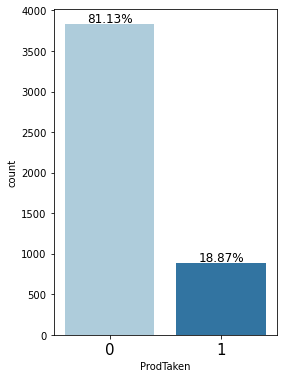

In [26]:
labeled_barplot(data,'ProdTaken',perc=True, rotation=0)

* As mentioned in the problem statement, it was observed that only about 19% of customers purchased the package.

### Observations on Age

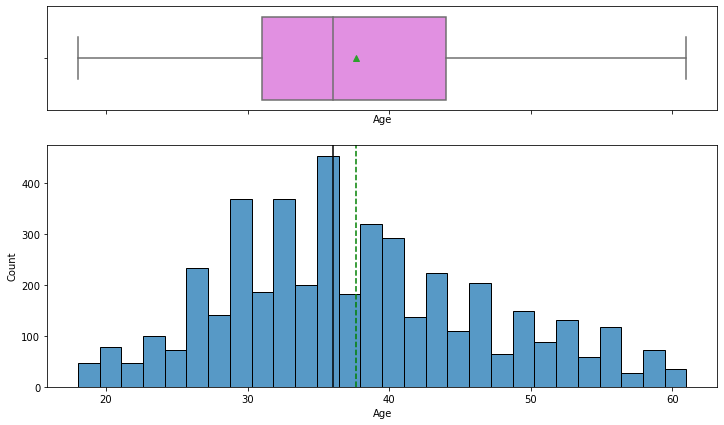

In [27]:
hist_box(data,'Age')

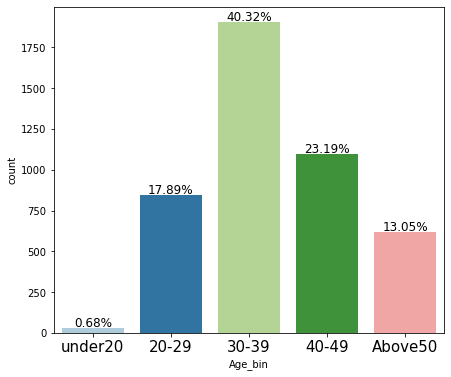

In [28]:
labeled_barplot(data,'Age_bin',perc=True, rotation=0)

* The age of the customer base varies from the 20s to the 60s, and it is relatively close to the normal distribution.
* The main customer base is in their 30s (about 40%) and the number of customers under 20 is the smallest with less than 1%.

### Observations on TypeofContact

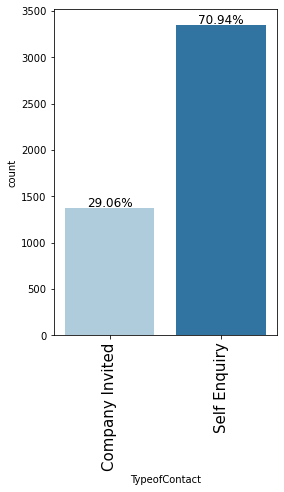

In [29]:
labeled_barplot(data,'TypeofContact',perc=True)

* Only about 30% of customers are invited by the company, and the majority of 70% of customers are self-inquiring customers.

### Observations on CityTier

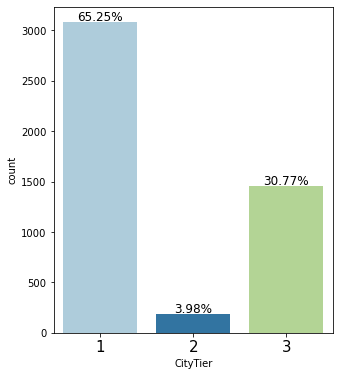

In [30]:
labeled_barplot(data,'CityTier',perc=True,rotation=0)

* It was observed that there is a large distribution of customers in the order of city tier1, tier3, and tier2.
* "CityTier1" customers account for more than half of the time, at around 65%, and "CItyTier2" customers account for a very small percentage at about 4%.

### Observations on DurationOfPitch

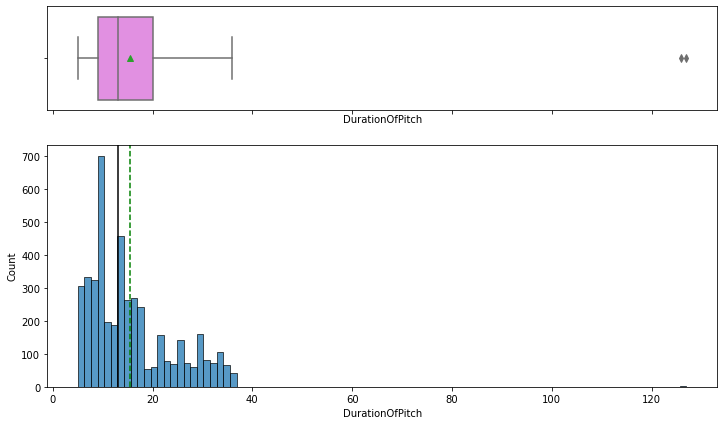

In [31]:
hist_box(data,'DurationOfPitch')

* The average publicity period of salespeople is about 15, and more than 120 very extreme outliers have also been observed.
* With the exception of the extreme outliers, a slightly right-skewed distribution is observed.

### Observations on Occupation

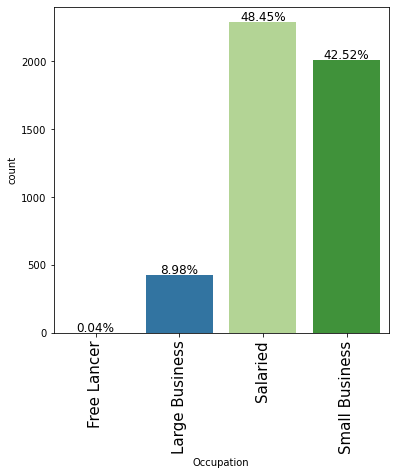

In [32]:
labeled_barplot(data,'Occupation',perc=True)

In [33]:
data['Occupation'].value_counts()

Salaried          2288
Small Business    2008
Large Business     424
Free Lancer          2
Name: Occupation, dtype: int64

* The distribution of customers' occupations is in the order of "Salaried", "Small Business", "Large Business" and "Free Lancer".  
* "Salaried" and "Small Business" each account for the majority at over 40%, while "Free Lancer" accounts for only 0.04% (2 counts).

### Observations on Gender

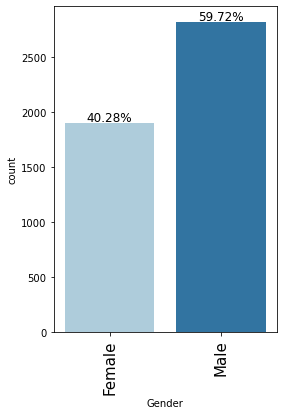

In [34]:
labeled_barplot(data,'Gender',perc=True)

* It was observed that male customers outnumbered female customers.

### Observations on NumberOfPersonVisiting

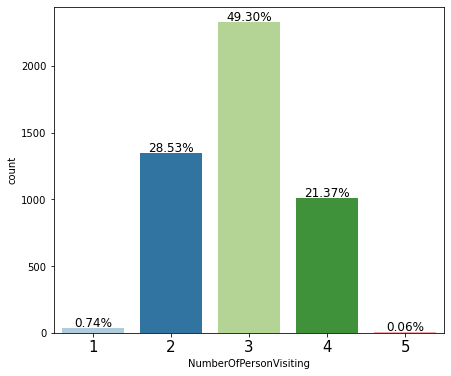

In [35]:
labeled_barplot(data,'NumberOfPersonVisiting',perc=True,rotation=0)

* The highest number of trippers was 3 people, at about 50%.
* In most cases, the trip was observed to be planned for 2 to 4 people.

### Observations on NumberOfFollowups

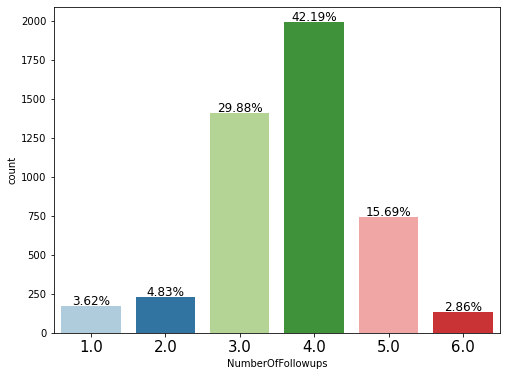

In [36]:
labeled_barplot(data,'NumberOfFollowups',perc=True,rotation=0)

* The highest number of follow-ups was 4, at about 40%.
* In most cases, the number of follow-ups after pitch is 3 to 5 times.

### Observations on ProductPitched

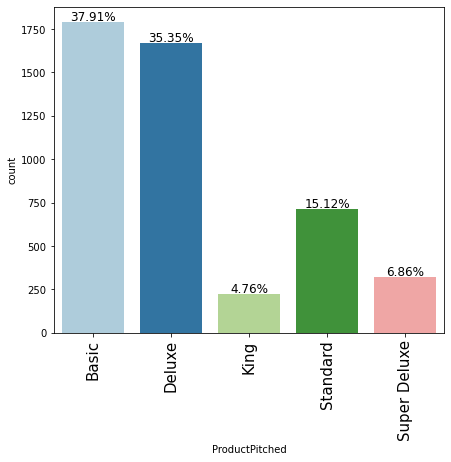

In [37]:
labeled_barplot(data,'ProductPitched',perc=True)

* Sales were mainly focused on "Basic" and "Deluxe", with "King" being the least proposed.

### Observations on PreferredPropertyStar

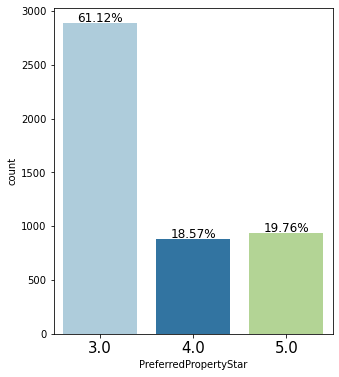

In [38]:
labeled_barplot(data,'PreferredPropertyStar',perc=True,rotation=0)

* It was observed that the preferred hotel of more than 60% of the customers is 3-star property, and the preference for 4-star property and 5-star property is not much different.

### Observations on MaritalStatus

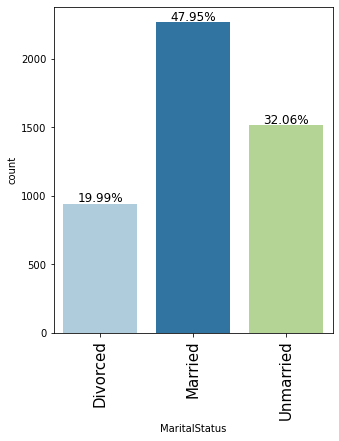

In [39]:
labeled_barplot(data,'MaritalStatus',perc=True)

* The distribution of customers' marital status is in the order of "Married", "Unmarried" and "Divorced".
* Nearly half of our customers are married.

### Observations on NumberOfTrips

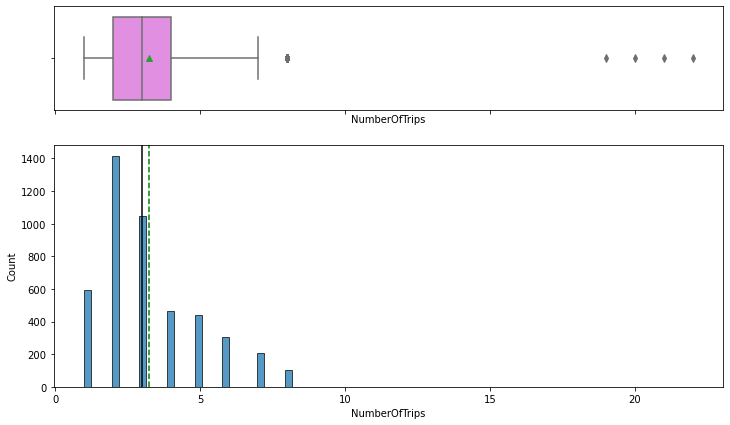

In [40]:
hist_box(data,'NumberOfTrips')

* The average number of trips in a year by customer is about 3, very extreme outliers, which are about 20, have also been observed.
* A right-skewed distribution is observed.

### Observations on Passport

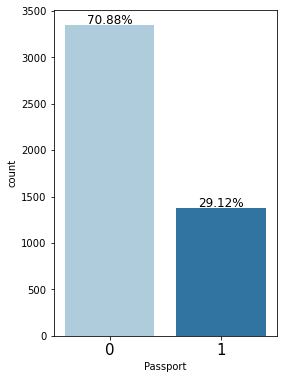

In [41]:
labeled_barplot(data,'Passport',perc=True,rotation=0)

* It was observed that only about 30% of customers have passports.

### Observations on PitchSatisfactionScore

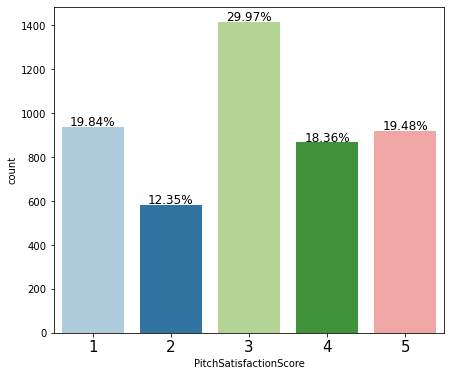

In [42]:
labeled_barplot(data,'PitchSatisfactionScore',perc=True,rotation=0)

* Although the sales pitch satisfaction scores are somewhat evenly distributed, among them, the customers who gave a mid-point score (3 points ) were the most at about 30%.

### Observations on OwnCar

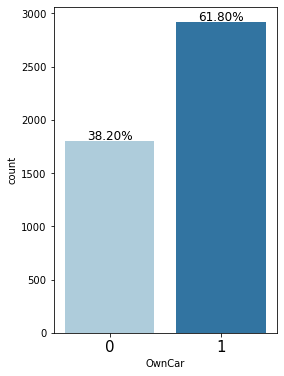

In [43]:
labeled_barplot(data,'OwnCar',perc=True,rotation=0)

* About 60% of customers own a car and the remaining do not own a car.

### Observations on NumberOfChildrenVisiting

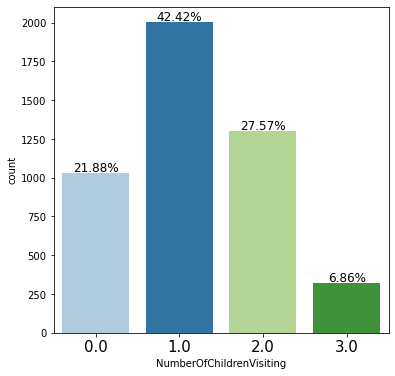

In [44]:
labeled_barplot(data,'NumberOfChildrenVisiting',perc=True,rotation=0)

* About 40% of customers took one child under 5 years old on their trip, and about 20% of customers did not bring a child under 5 on their trip.
* Less than 7% of customers were traveling with three children under the age of 5.


### Observations on Designation

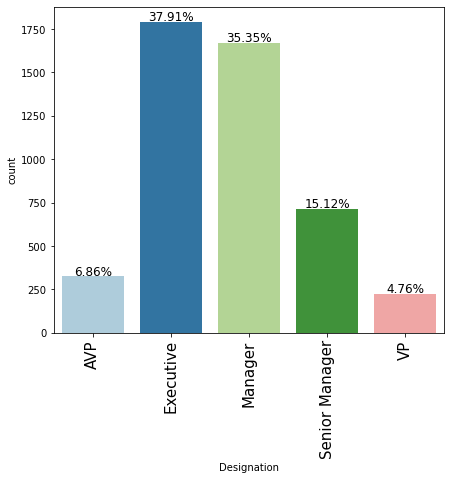

In [45]:
labeled_barplot(data,'Designation',perc=True)

* Among customers, "Execute" and "Manager" accounted for the most at 38% and 35%, respectively, and "VP" was the least at less than 5%.

### Observations on MonthlyIncome

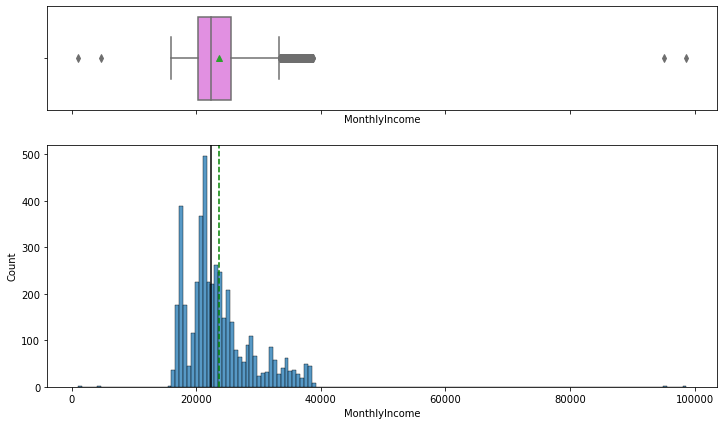

In [46]:
hist_box(data,'MonthlyIncome')

* Some lower outliers were observed along with many higher outliers, and the distribution was slightly right-skewed.

## EDA - Bivariate analysis

### Functions

In [47]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

In [1]:
# function to plot stacked bar chart


def stacked_barplot(data, predictor, target, legend=True, annot=False, rotation=0, xticksize=11,xlabsize=13):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    legend : show on/off legend
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    ax = tab.plot(kind="bar", stacked=True, figsize=(count + 5, 6))

    if legend == True:
        plt.legend(
            loc="lower left", frameon=False,
        )
        plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    elif legend == False:
        plt.legend([], [], frameon=False)
    plt.xticks(rotation=rotation, fontsize=xticksize)
    ax.set_xlabel(ax.get_xlabel(),size=xlabsize)
    plt.show()

In [49]:
# function to visualize 3 categorical variables with count plot

def splitted_countplot(data,predictor,target,hue=None,rotation=0):
    target_list = list(data[target].dropna().unique()) # extract a list of unique value except NaN in target variables
    target_length = len(target_list)
    nrow_subplot = (target_length//3)+1
    fig_height = nrow_subplot*4
    fig,ax = plt.subplots(nrow_subplot,3,figsize=(12,fig_height))
    plt.subplots_adjust(hspace=0.3,wspace=0.3)
    
    # define extra subplot coord and delete it.  
    for i in range(nrow_subplot):
        for j in range(3):
            if i*3+j+1 > target_length:
                fig.delaxes(ax[i,j])
    #------------------------------------------------    
    
    for k, uniq_value in enumerate(target_list):
        row_index=k//3 # for ax index
        col_index=k%3 # for ax index
        subdata=data[data[target]==uniq_value] # generate subset of data including only one type of value in target variable
        subfig = sns.countplot(data=subdata,x=predictor,hue=hue,ax=ax[row_index,col_index])
        subfig.set_xticklabels(subfig.get_xticklabels(), rotation=rotation)
        ax[row_index,col_index].set_title(uniq_value)
    plt.show()

### Pairplot

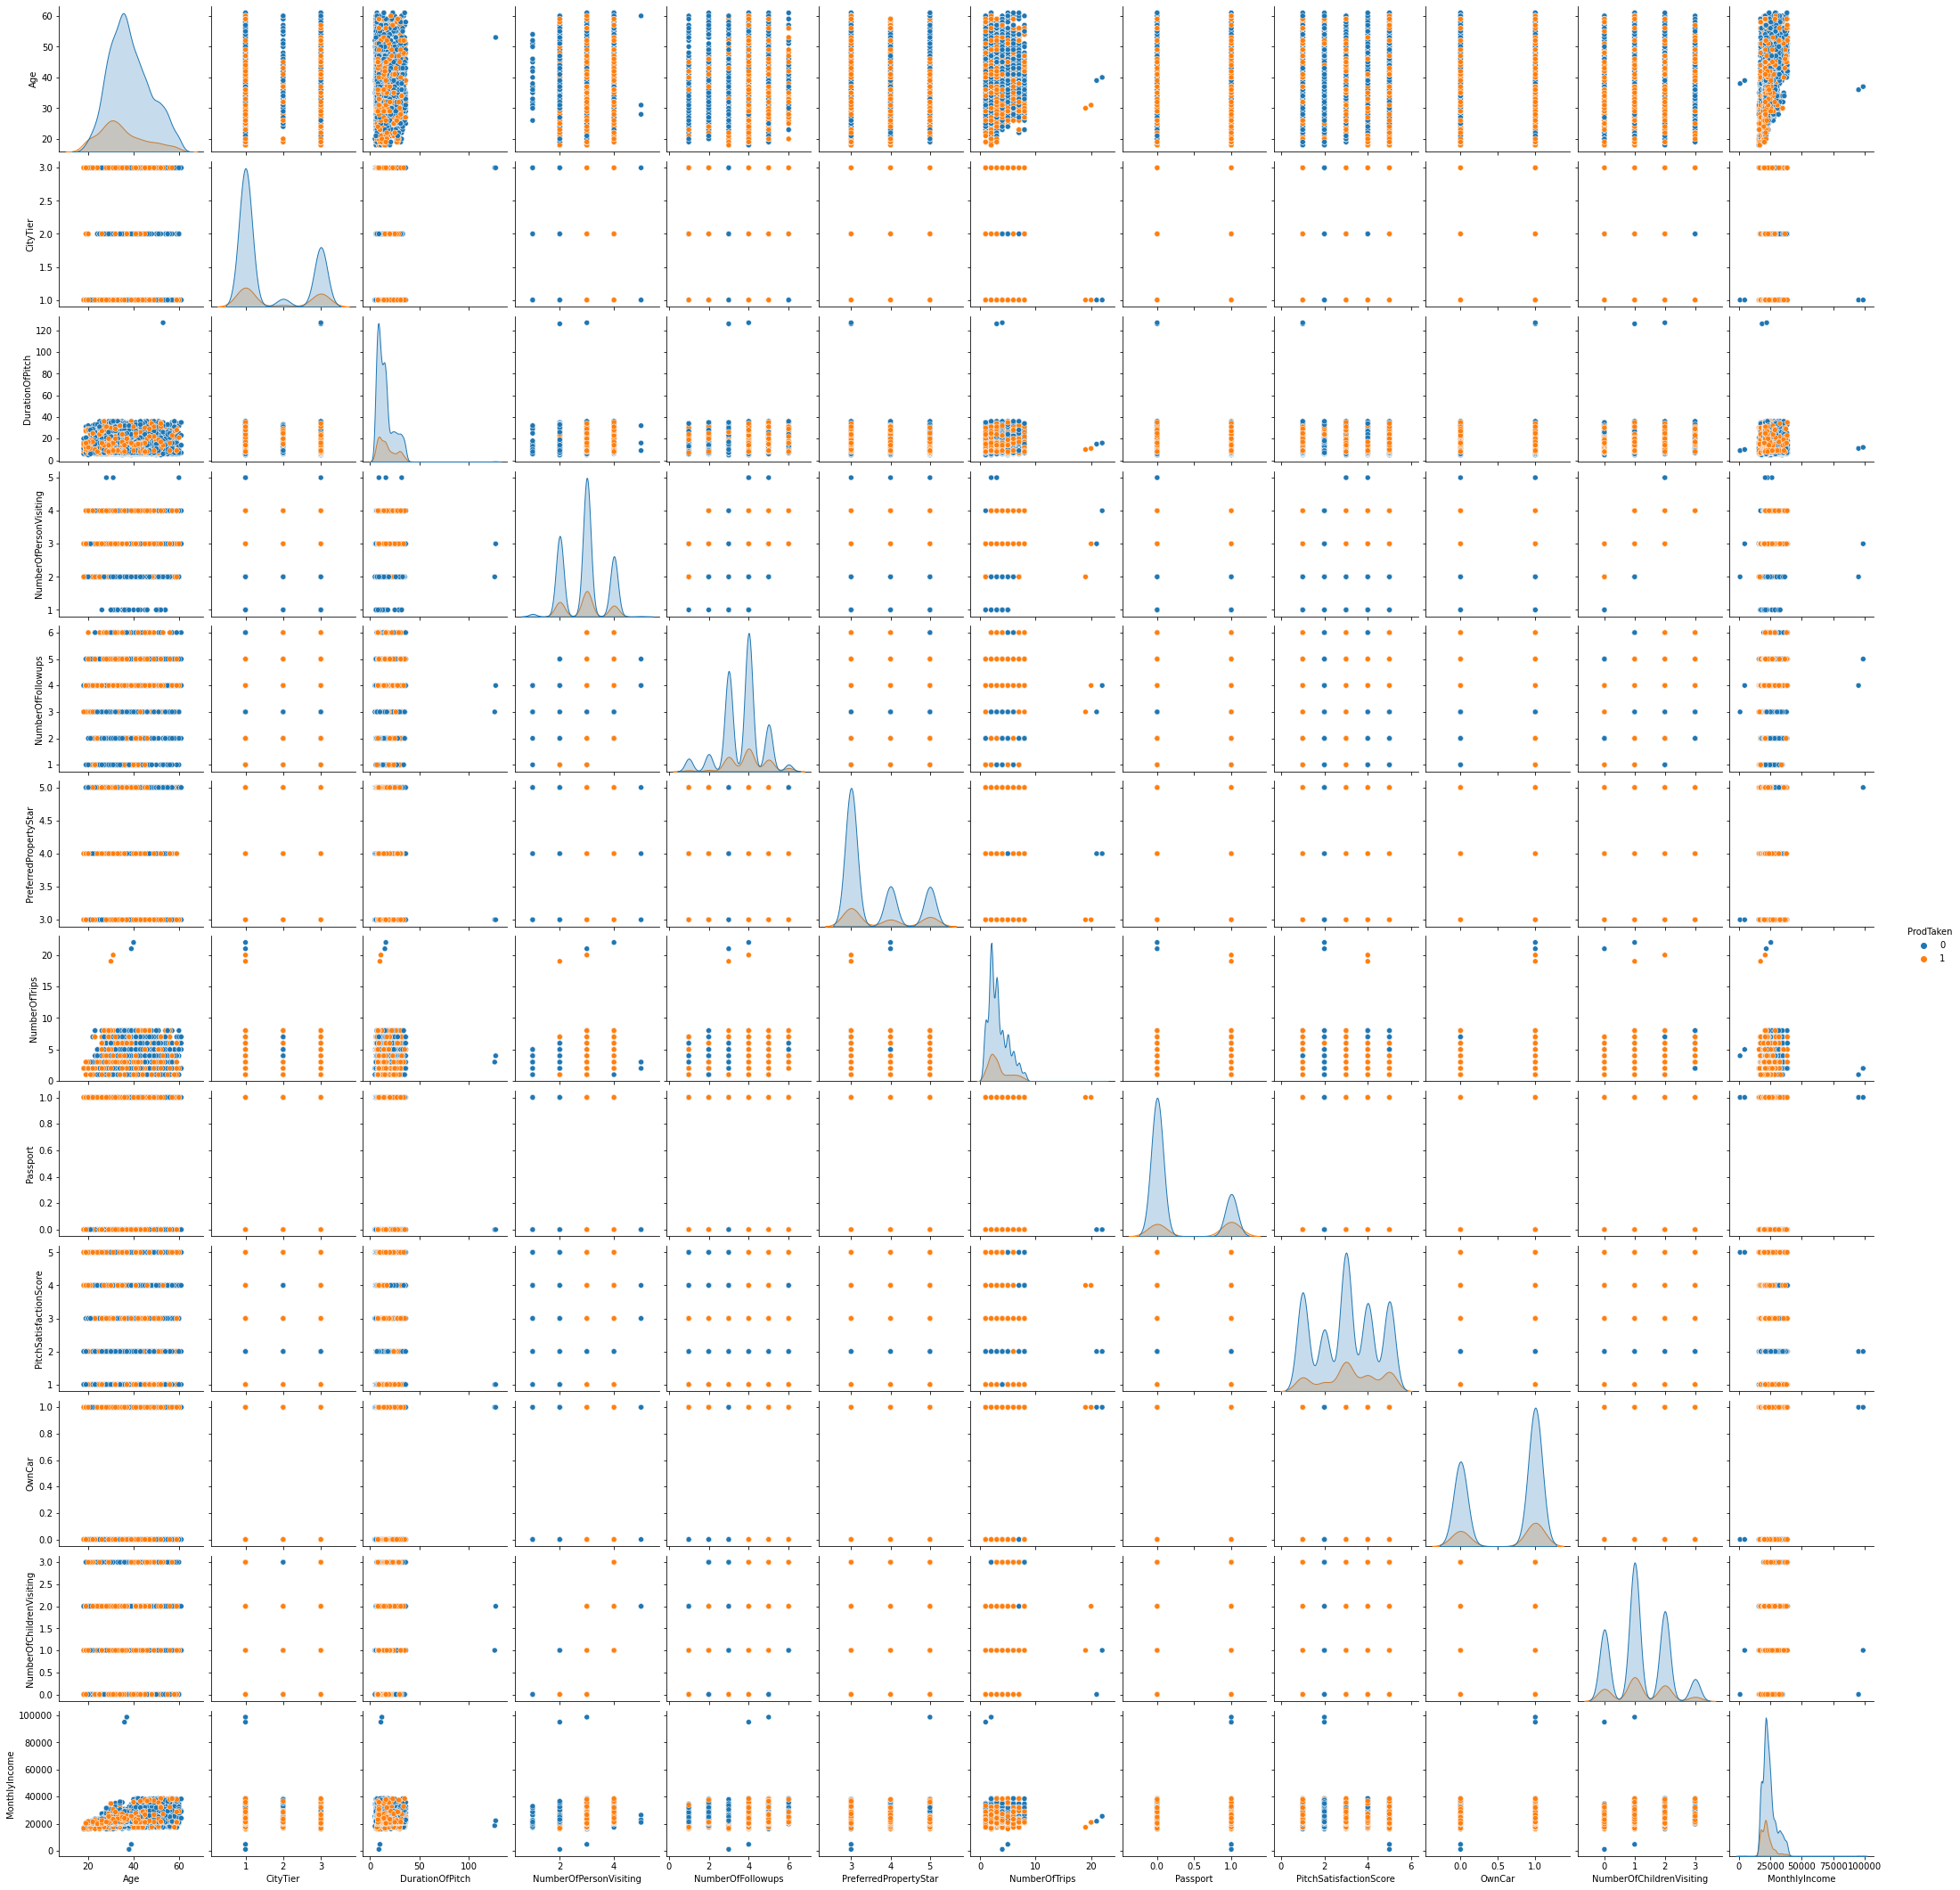

In [50]:
sns.pairplot(data,hue='ProdTaken')
plt.show()

### Correlation heatmap

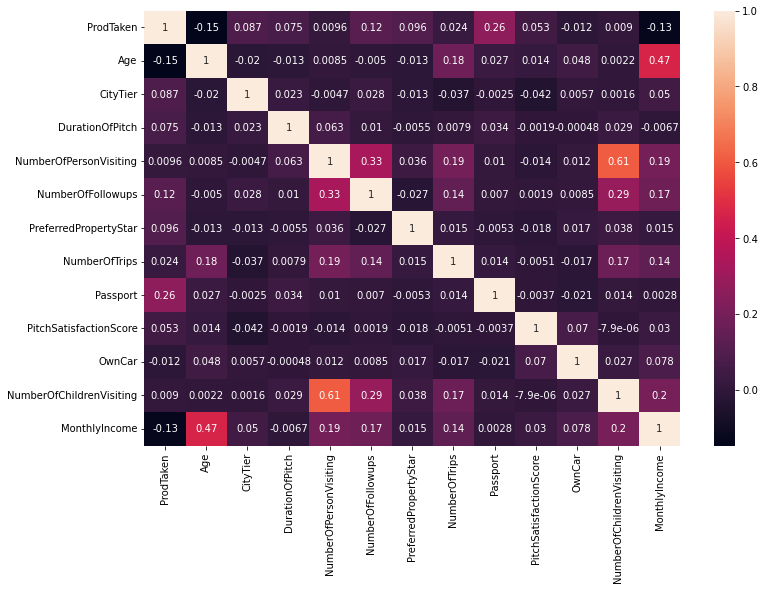

In [51]:
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(),annot=True)
plt.show()

* The presence or absence of a passport was observed to have a weak correlation with purchasing a package. ( Correlation = 0.26 )

### ProdTaken vs Age

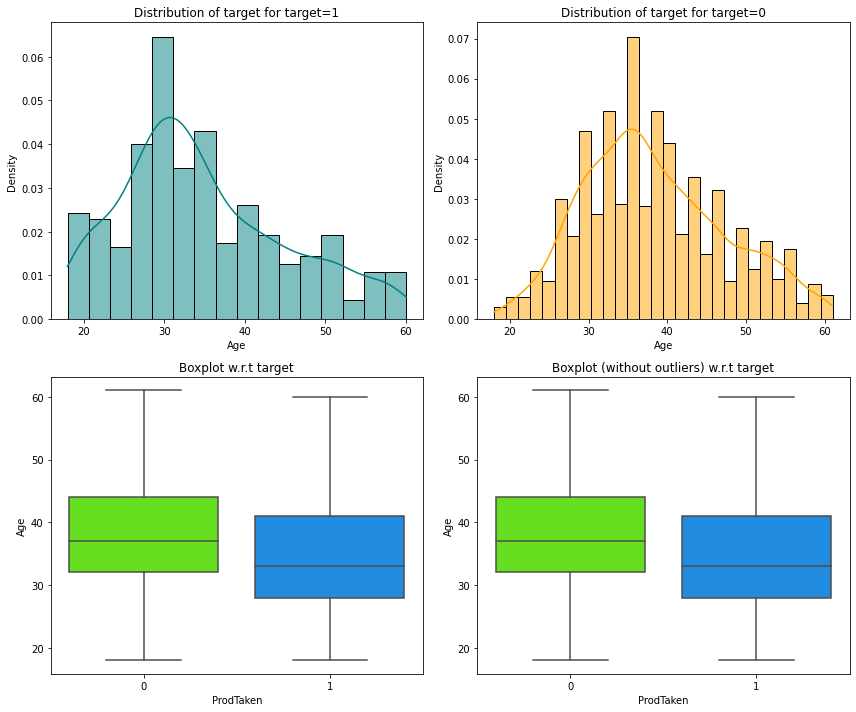

In [52]:
distribution_plot_wrt_target(data, 'Age', 'ProdTaken')

ProdTaken     0    1   All
Age_bin                   
All        3651  841  4492
30-39      1592  312  1904
20-29       586  259   845
40-49       947  148  1095
Above50     515  101   616
under20      11   21    32
------------------------------------------------------------------------------------------------------------------------


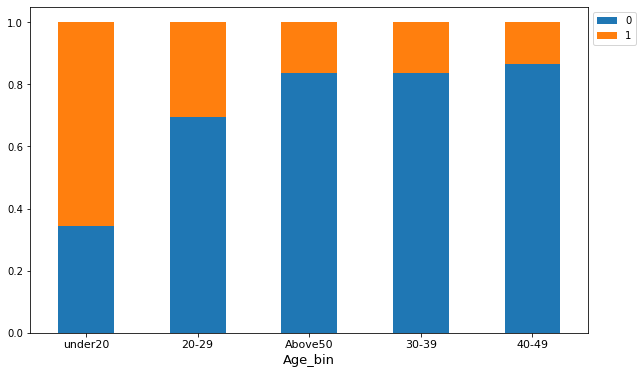

In [53]:
stacked_barplot(data,'Age_bin','ProdTaken')

* It was observed that the age group of customers who purchased the package was relatively lower.

### ProdTaken vs TypeofContact

ProdTaken           0    1   All
TypeofContact                   
All              3831  891  4722
Self Enquiry     2753  597  3350
Company Invited  1078  294  1372
------------------------------------------------------------------------------------------------------------------------


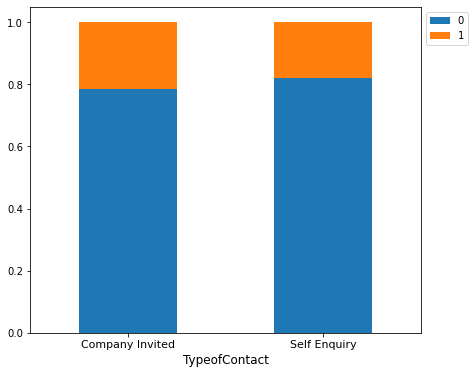

In [54]:
stacked_barplot(data,'TypeofContact','ProdTaken', xlabsize=12)

* There was no significant difference in whether the package was purchased according to the contact type.

### ProdTaken vs CityTier

ProdTaken     0    1   All
CityTier                  
All        3831  891  4722
1          2577  504  3081
3          1108  345  1453
2           146   42   188
------------------------------------------------------------------------------------------------------------------------


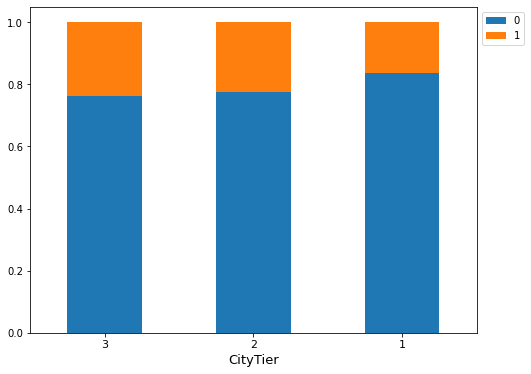

In [55]:
stacked_barplot(data,'CityTier','ProdTaken')

* Customers living in city tier 1 were observed to purchase packages relatively less than other customers.

### ProdTaken vs DurationOfPitch

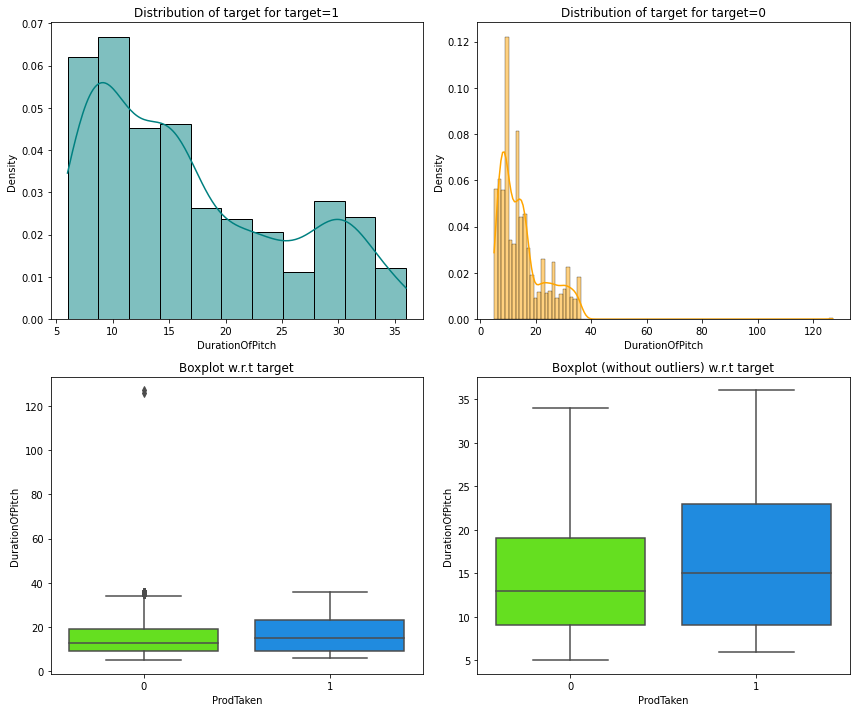

In [56]:
distribution_plot_wrt_target(data,'DurationOfPitch','ProdTaken')

* Overall, the group that purchased the package tended to have slightly longer pitch durations, but customers who experienced very long pitch durations did not purchase the package.

### ProdTaken vs Occupation

ProdTaken          0    1   All
Occupation                     
All             3831  891  4722
Salaried        1889  399  2288
Small Business  1636  372  2008
Large Business   306  118   424
Free Lancer        0    2     2
------------------------------------------------------------------------------------------------------------------------


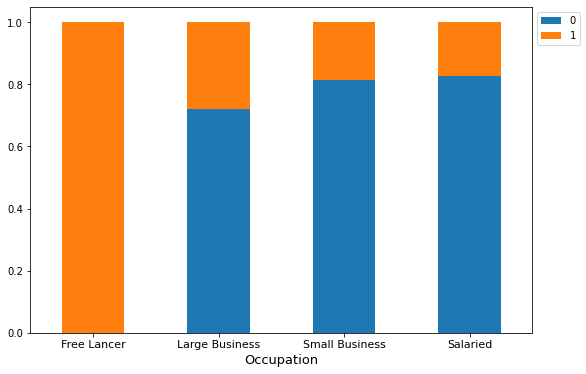

In [57]:
stacked_barplot(data,'Occupation','ProdTaken')

* "Large business" customers purchased relatively more packages than "Small business" or "Salaried workers" customers.
* All customers with "Free Lancer" occupation purchased the package, but the total number is only 2, so it may be difficult to give statistical significance.


### ProdTaken vs Gender

ProdTaken     0    1   All
Gender                    
All        3831  891  4722
Male       2261  559  2820
Female     1570  332  1902
------------------------------------------------------------------------------------------------------------------------


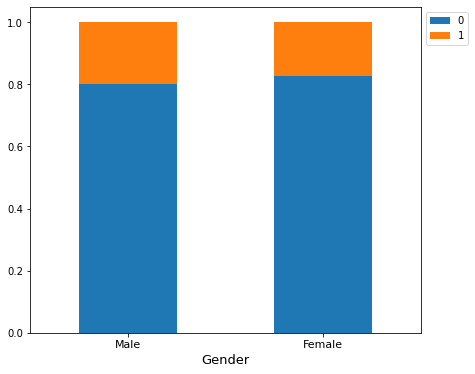

In [58]:
stacked_barplot(data,'Gender','ProdTaken')

* There was no difference in whether package purchases were made according to gender.

### ProdTaken vs NumberOfPersonVisiting

ProdTaken                  0    1   All
NumberOfPersonVisiting                 
All                     3831  891  4722
3                       1882  446  2328
2                       1093  254  1347
4                        818  191  1009
1                         35    0    35
5                          3    0     3
------------------------------------------------------------------------------------------------------------------------


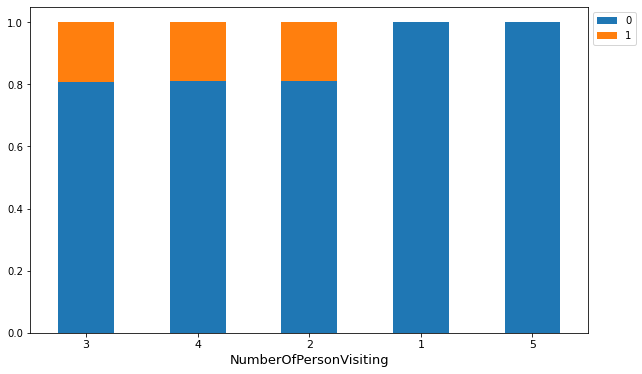

In [59]:
stacked_barplot(data,'NumberOfPersonVisiting','ProdTaken')

* There was no customer who purchased the package alone or with more than 4 members.
* There was no difference in whether or not to purchase a package according to the number of travelers from 2 to 4 people.

### ProdTaken vs NumberOfFollowups

ProdTaken             0    1   All
NumberOfFollowups                 
All                3795  883  4678
4.0                1626  366  1992
3.0                1179  232  1411
5.0                 553  188   741
6.0                  82   53   135
2.0                 204   24   228
1.0                 151   20   171
------------------------------------------------------------------------------------------------------------------------


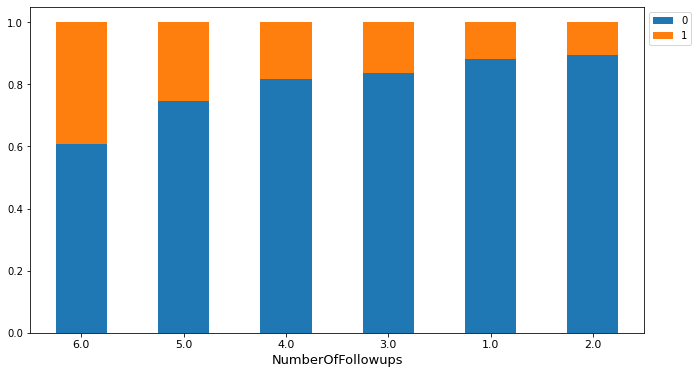

In [60]:
stacked_barplot(data,'NumberOfFollowups','ProdTaken')

* A tendency to purchase more packages was observed as the number of follow-ups after the pitch increased.

### ProdTaken vs ProductPitched

ProdTaken          0    1   All
ProductPitched                 
All             3831  891  4722
Basic           1253  537  1790
Deluxe          1471  198  1669
Standard         594  120   714
King             205   20   225
Super Deluxe     308   16   324
------------------------------------------------------------------------------------------------------------------------


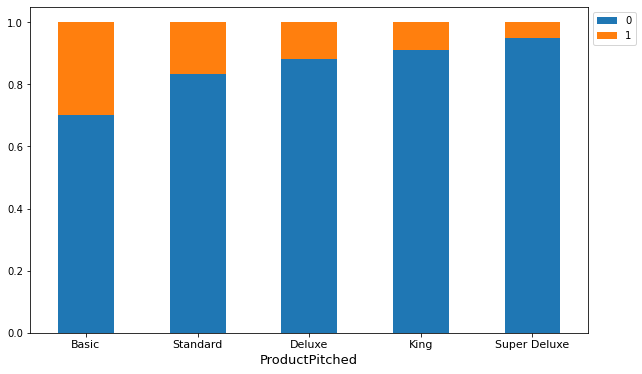

In [61]:
stacked_barplot(data,'ProductPitched','ProdTaken')

* When the salesperson pitched the "Basic" product, customers purchased the package relatively the most and the "Super Deluxe" the least.

### ProdTaken vs PreferredPropertyStar

ProdTaken                 0    1   All
PreferredPropertyStar                 
All                    3811  885  4696
3.0                    2418  468  2886
5.0                     692  241   933
4.0                     701  176   877
------------------------------------------------------------------------------------------------------------------------


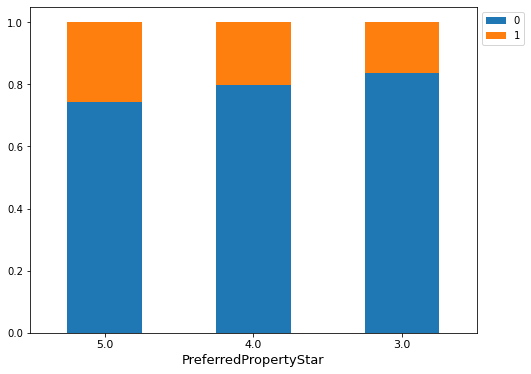

In [62]:
stacked_barplot(data,'PreferredPropertyStar','ProdTaken')

* Customers who prefer higher-rated hotels tend to purchase more packages.

### ProdTaken vs MaritalStatus

ProdTaken         0    1   All
MaritalStatus                 
All            3831  891  4722
Unmarried      1060  454  1514
Married        1950  314  2264
Divorced        821  123   944
------------------------------------------------------------------------------------------------------------------------


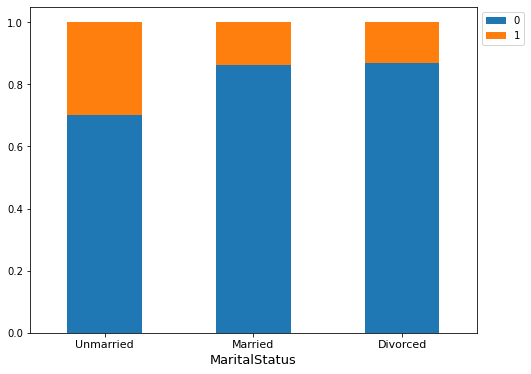

In [63]:
stacked_barplot(data,'MaritalStatus','ProdTaken')

* Unmarried customers purchased relatively more packages than those with married experience.

### ProdTaken vs NumberOfTrips

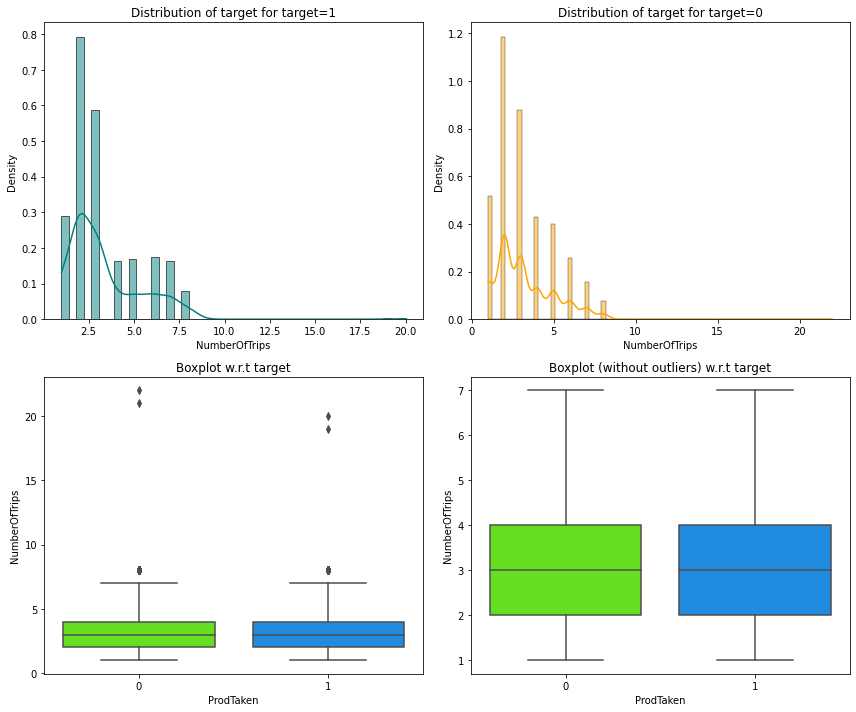

In [64]:
distribution_plot_wrt_target(data,'NumberOfTrips','ProdTaken')

ProdTaken         0    1   All
NumberOfTrips                 
All            3705  879  4584
2.0            1126  288  1414
3.0             835  213  1048
1.0             490  105   595
6.0             243   63   306
5.0             380   61   441
4.0             406   59   465
7.0             150   59   209
8.0              73   29   102
19.0              0    1     1
20.0              0    1     1
21.0              1    0     1
22.0              1    0     1
------------------------------------------------------------------------------------------------------------------------


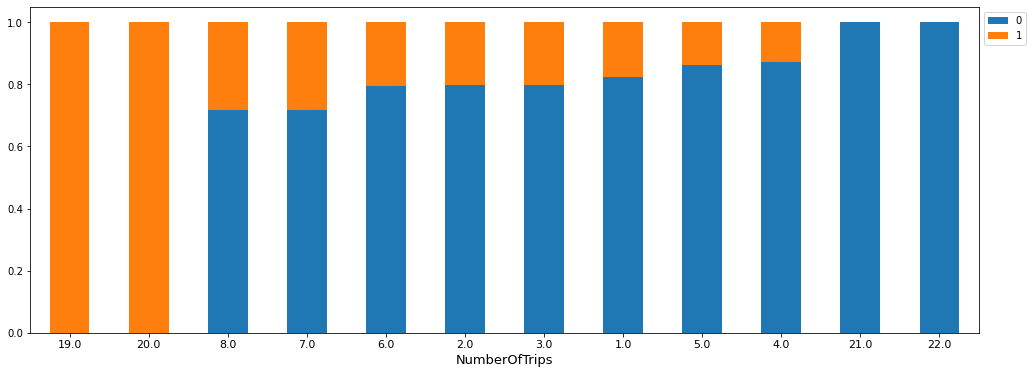

In [65]:
stacked_barplot(data,'NumberOfTrips','ProdTaken')

* A slight difference was found in the package purchase ratio according to the average number of annual trips, but overall, no significant difference was observed in the distribution of the average number of annual trips between customers who purchased packages and those who did not.

### ProdTaken vs Passport

ProdTaken     0    1   All
Passport                  
All        3831  891  4722
1           895  480  1375
0          2936  411  3347
------------------------------------------------------------------------------------------------------------------------


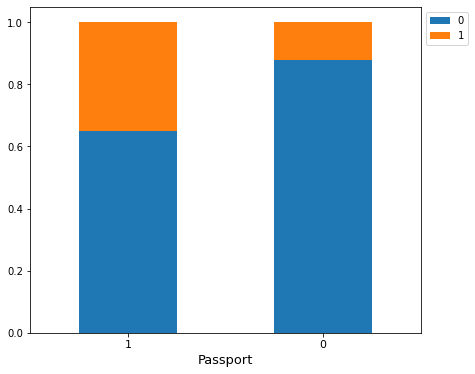

In [66]:
stacked_barplot(data,'Passport','ProdTaken')

* A tendency was observed for customers with passports to purchase packages relatively more than those without passports.

### ProdTaken vs PitchSatisfactionScore

ProdTaken                  0    1   All
PitchSatisfactionScore                 
All                     3831  891  4722
3                       1113  302  1415
5                        722  198   920
4                        707  160   867
1                        794  143   937
2                        495   88   583
------------------------------------------------------------------------------------------------------------------------


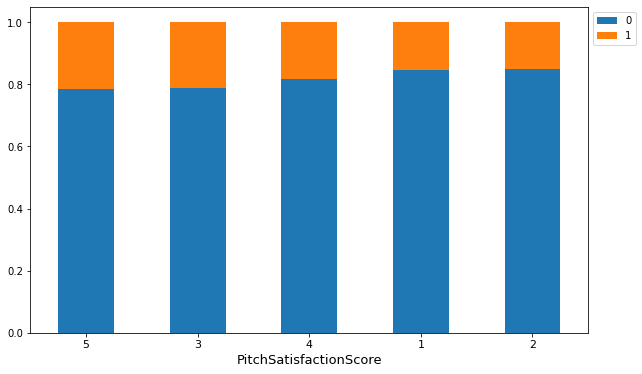

In [67]:
stacked_barplot(data,'PitchSatisfactionScore','ProdTaken')

* Although there was a tendency to purchase more packages as the satisfaction of the pitch increased, it was observed that there was no complete agreement.

### ProdTaken vs OwnCar

ProdTaken     0    1   All
OwnCar                    
All        3831  891  4722
1          2378  540  2918
0          1453  351  1804
------------------------------------------------------------------------------------------------------------------------


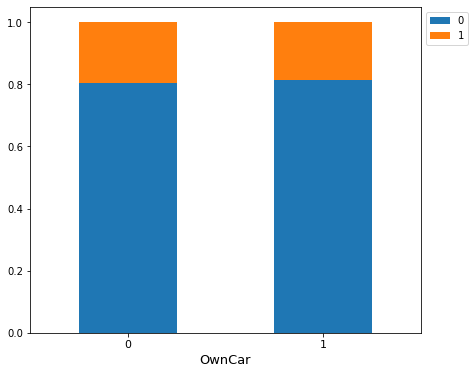

In [68]:
stacked_barplot(data,'OwnCar','ProdTaken')

* No clear difference was observed in whether or not to purchase a package according to vehicle ownership.

### ProdTaken vs NumberOfChildrenVisiting

ProdTaken                    0    1   All
NumberOfChildrenVisiting                 
All                       3778  884  4662
1.0                       1625  378  2003
2.0                       1054  248  1302
0.0                        841  192  1033
3.0                        258   66   324
------------------------------------------------------------------------------------------------------------------------


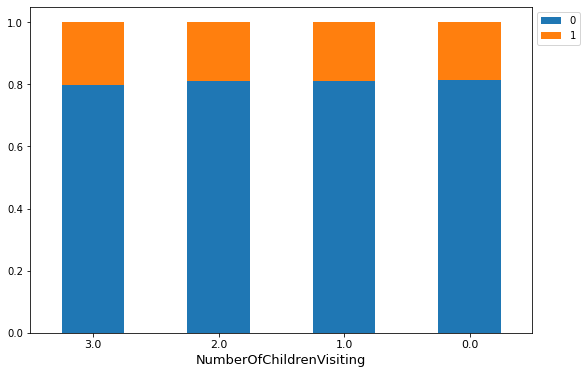

In [69]:
stacked_barplot(data,'NumberOfChildrenVisiting','ProdTaken')

* The number of children under the age of 5 accompanying a trip does not appear to affect package purchases.
* It was observed that approximately 78% of customers were accompanied by one or more children under 5 years of age.

### ProdTaken vs Designation

ProdTaken          0    1   All
Designation                    
All             3831  891  4722
Executive       1253  537  1790
Manager         1471  198  1669
Senior Manager   594  120   714
VP               205   20   225
AVP              308   16   324
------------------------------------------------------------------------------------------------------------------------


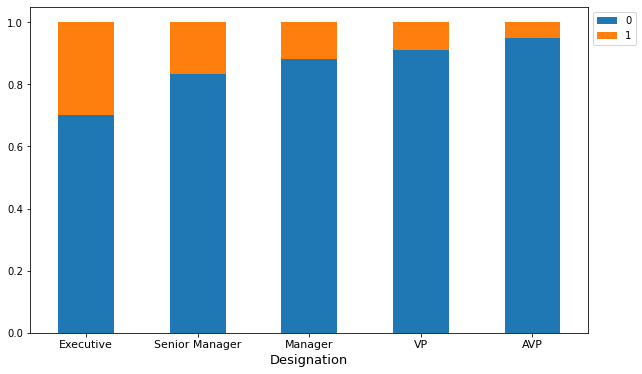

In [70]:
stacked_barplot(data,'Designation','ProdTaken')

* Customer's designation was observed to influence package purchase. 
* Relatively, the "Executive" group purchased the most packages and the "AVP group" purchased the least.


### ProdTaken vs MonthlyIncome

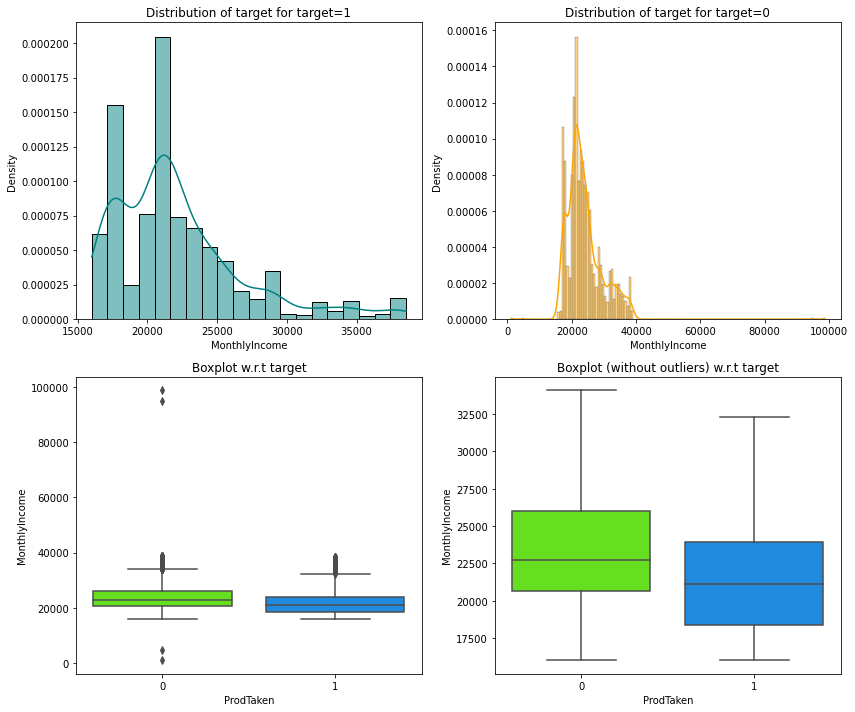

In [71]:
distribution_plot_wrt_target(data,'MonthlyIncome','ProdTaken')

* It was observed that the monthly income of customers who purchased the package was rather lower than the income distribution of customers who did not purchase the package.

### ProductPitched vs Designation

ProductPitched  Basic  Deluxe  King  Standard  Super Deluxe   All
Designation                                                      
VP                  0       0   225         0             0   225
All              1790    1669   225       714           324  4722
AVP                 0       0     0         0           324   324
Executive        1790       0     0         0             0  1790
Manager             0    1669     0         0             0  1669
Senior Manager      0       0     0       714             0   714
------------------------------------------------------------------------------------------------------------------------


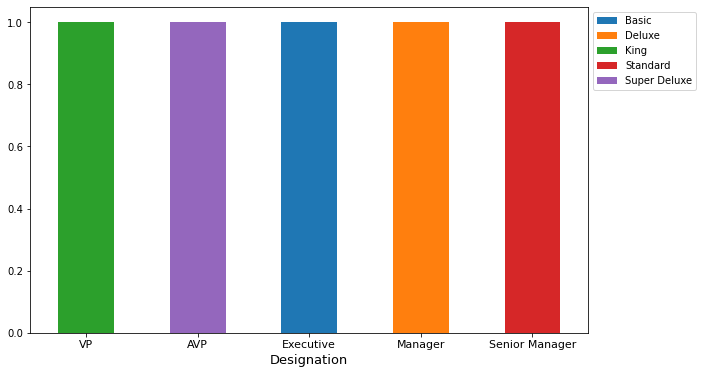

In [72]:
stacked_barplot(data,'Designation','ProductPitched')

* The pitched product was proposed by completely according to designation of customer.
* The variables `ProductPitched` and `Designation` are completely dependent.

### ProductPitched vs Age vs ProTaken

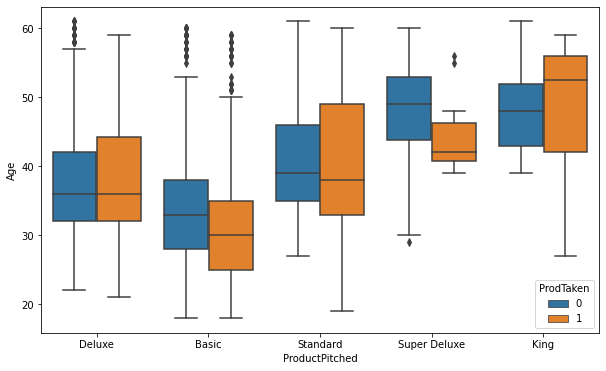

In [73]:
plt.figure(figsize=(10,6))
sns.boxplot(data=data,x='ProductPitched',y='Age',hue='ProdTaken')
plt.show()

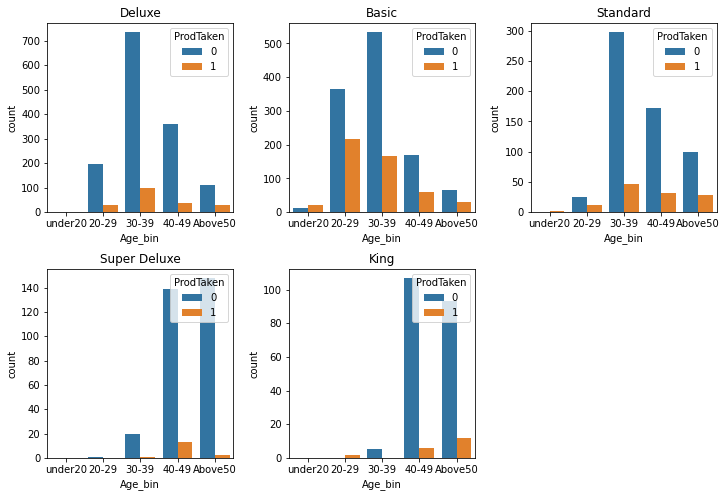

In [74]:
splitted_countplot(data,'Age_bin','ProductPitched',hue='ProdTaken')

* Age of customers who purchased the 'Basic' package and the 'Super Deluxe' package tend to be lower than those who did not purchase the same package.
* Age of customers who purchased the 'King' package tend to be higher than those who did not purchase the same package.
* The age group of most customers who purchased the "Super Deluxe" package is somewhat limited to 40-50.


### ProductPitched vs TypeOfContact vs ProTaken

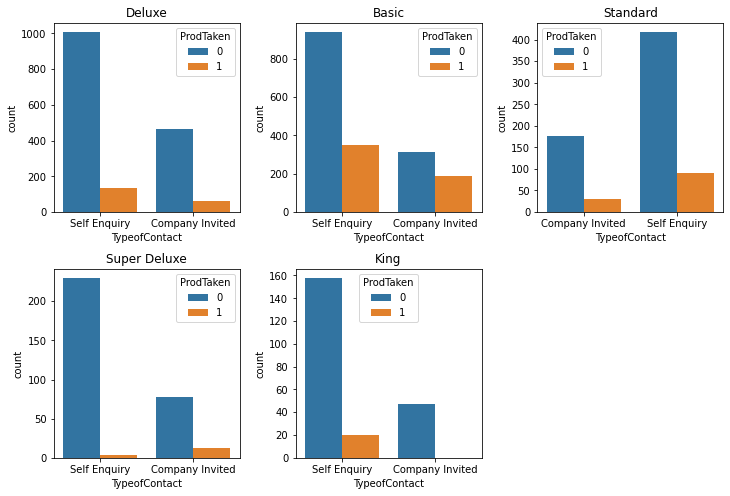

In [75]:
splitted_countplot(data,'TypeofContact','ProductPitched',hue='ProdTaken')

* The customers who purchased the "King" package were all self-inquired customers.
* Customers who purchase "Super Deluxe" have a relatively high percentage of purchases made through company invitations.


### ProductPitched vs CityTier vs ProTaken

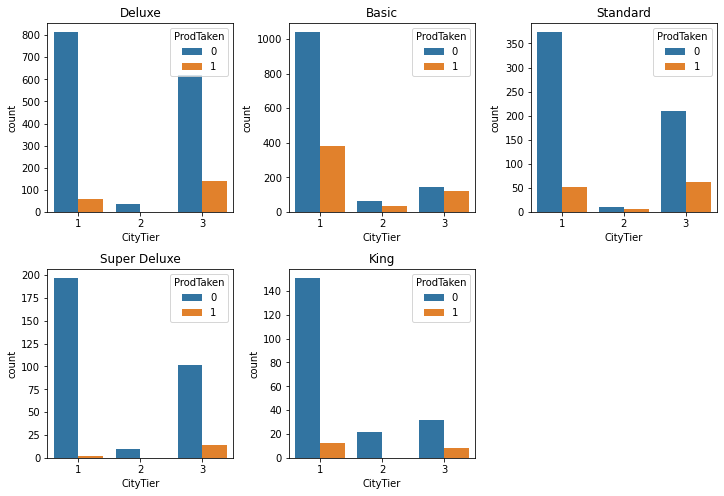

In [76]:
splitted_countplot(data,'CityTier','ProductPitched',hue='ProdTaken')

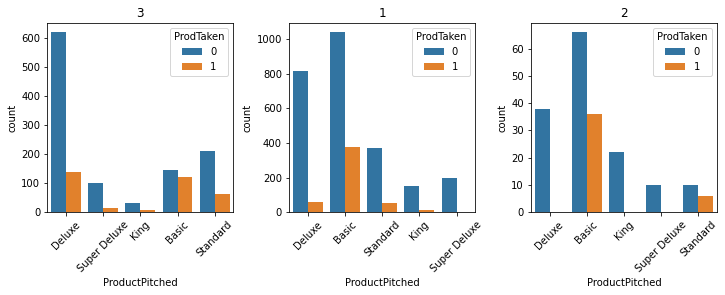

In [77]:
splitted_countplot(data,'ProductPitched','CityTier',hue='ProdTaken',rotation=45)

* Customers who are offered the "Basic”package and live in a tier 3 city are significantly more likely to choose to purchase than if they were not.
* In tier 2 cities, no packages other than the "Basic" and "Standard" packages were sold.
* Most customers who have purchased the "Super Deluxe" package live in tier 3 cities.

### ProductPitched vs DurationOfPitch vs ProdTaken

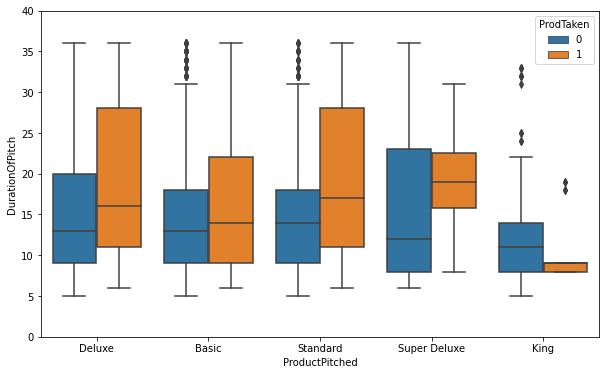

In [78]:
plt.figure(figsize=(10,6))
sns.boxplot(data=data,x='ProductPitched',y='DurationOfPitch',hue='ProdTaken')
plt.ylim(0,40)
plt.show()

* Overall, the duration of pitch of customers who purchased the package was longer than that of customers who did not purchase the same package, but it was shorter for customers who purchased the "King" package.

### ProductPitched vs Gender vs ProdTaken

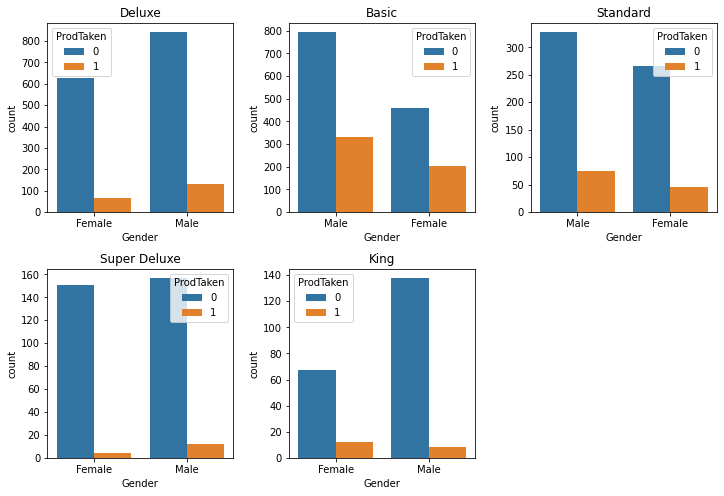

In [79]:
splitted_countplot(data,'Gender','ProductPitched',hue='ProdTaken')

* The "King" package was purchased relatively more by female customers, and the rest of the packages were more often purchased by male customers.

### ProductPitched vs NumberOfFollowups vs ProdTaken

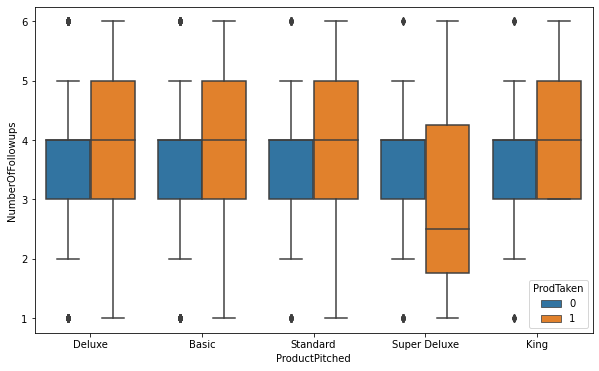

In [80]:
plt.figure(figsize=(10,6))
sns.boxplot(data=data,x='ProductPitched',y='NumberOfFollowups',hue='ProdTaken')
plt.show()

* Customers who purchase "Super Deluxe" have relatively fewer followups.
* Customers who purchased the "King" package all have 3 or more followups.

### ProductPitched vs PreferredPropertyStar vs ProdTaken

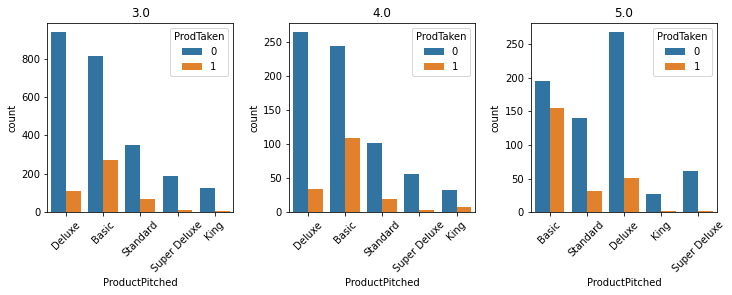

In [81]:
splitted_countplot(data,'ProductPitched','PreferredPropertyStar',hue='ProdTaken',rotation=45)

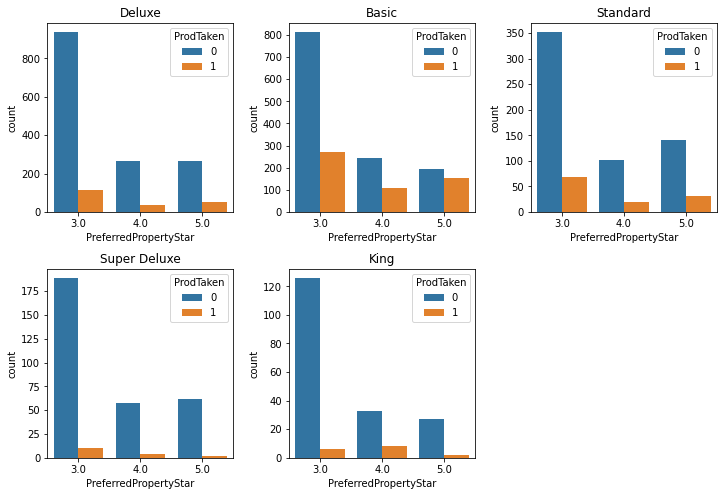

In [82]:
splitted_countplot(data,'PreferredPropertyStar','ProductPitched',hue='ProdTaken')

* Customers who purchase the "Basic" package tend to prefer hotels of higher-property star compared to other customer segments.

### ProductPitched vs MaritalStatus vs ProdTaken

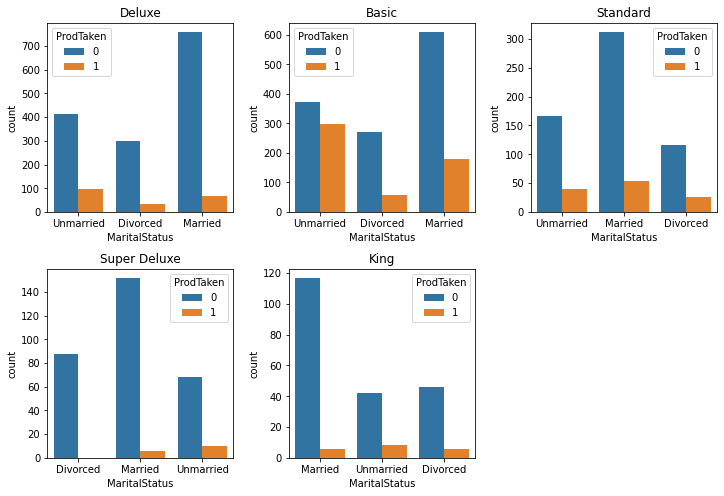

In [83]:
splitted_countplot(data,'MaritalStatus','ProductPitched',hue='ProdTaken')

* The percentage of unmarried customers who purchased the "Basic" package was relatively high compared to other groups.

### ProductPitched vs NumberOfTrips vs ProdTaken

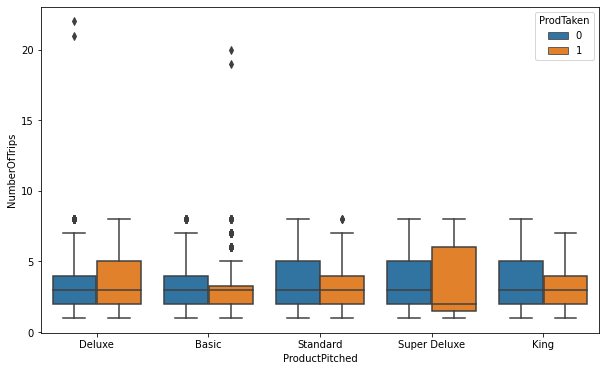

In [84]:
plt.figure(figsize=(10,6))
sns.boxplot(data=data,x='ProductPitched',y='NumberOfTrips',hue='ProdTaken')
plt.show()

### ProductPitched vs Passport vs ProdTaken

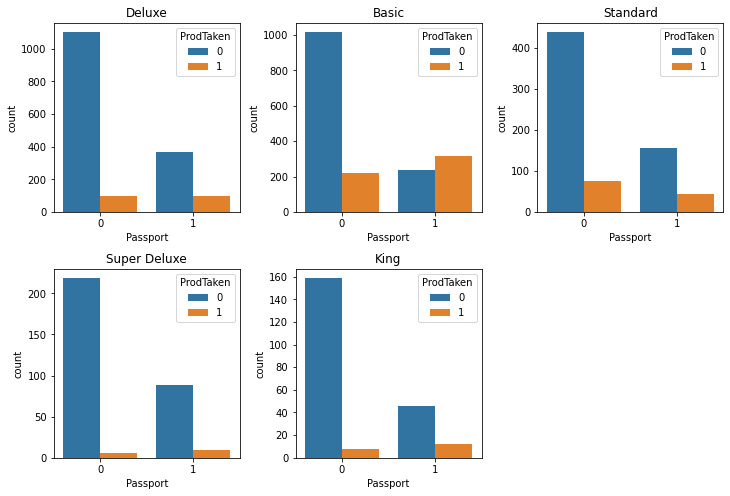

In [85]:
splitted_countplot(data,'Passport','ProductPitched',hue='ProdTaken')

* Customers who purchased the "Basic" package were more likely to have passports.

### ProductPitched vs PitchSatisfactionScore vs ProdTaken

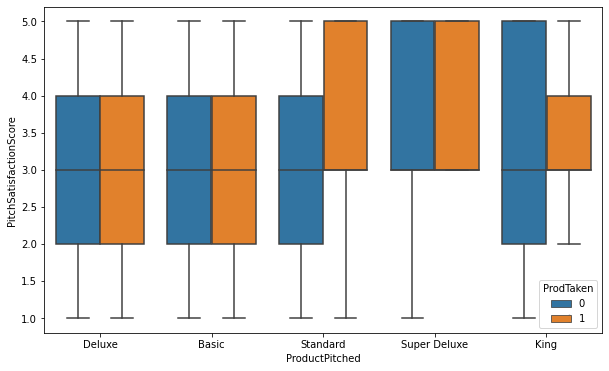

In [86]:
plt.figure(figsize=(10,6))
sns.boxplot(data=data,x='ProductPitched',y='PitchSatisfactionScore',hue='ProdTaken')
plt.show()

* Customers who purchased the "Standard" package tended to score higher than customers who didn't purchase the "Standard" package.
* Customers who were offered the "Super Deluxe" package gave higher scores than other groups regardless of whether they purchased the package or not.
* The range of points given for purchasing the "King" package is narrow compared to other groups.

### ProductPitched vs OwnCar vs ProdTaken

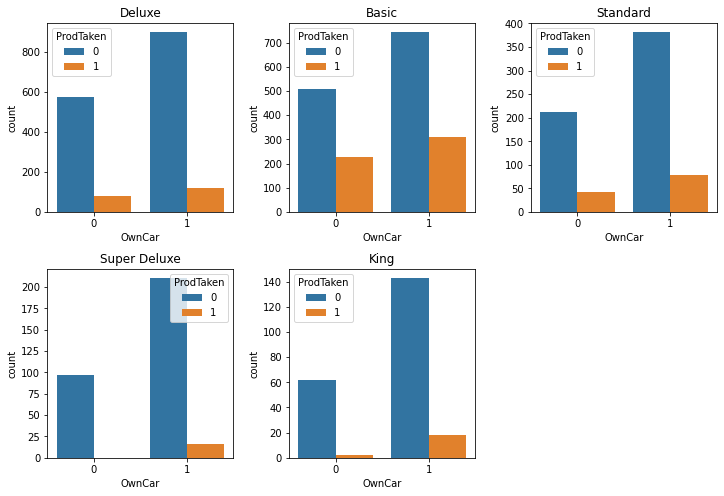

In [87]:
splitted_countplot(data,'OwnCar','ProductPitched',hue='ProdTaken')

* Customers who were offered the "Super Deluxe" package who did not own a car did not purchase the package.
* Among customers who were offered the “King” package, customers who did not own a car had a lower rate of purchasing the package.

### ProductPitched vs NumberOfChildrenVisiting vs ProdTaken

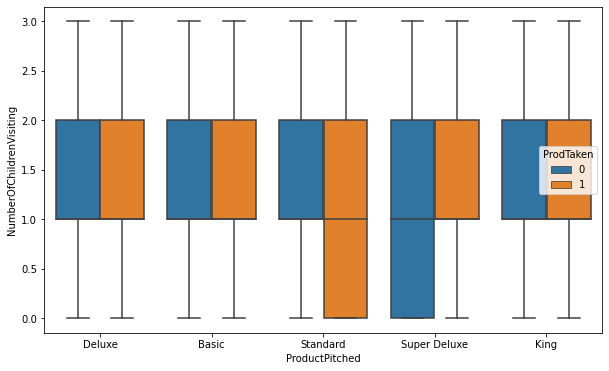

In [88]:
plt.figure(figsize=(10,6))
sns.boxplot(data=data,x='ProductPitched',y='NumberOfChildrenVisiting',hue='ProdTaken')
plt.show()

* Customers who purchase the "Standard" package are relatively more likely to be unaccompanied by children under the age of 5 compared to those who purchase other packages.

### ProductPitched vs MonthlyIncome vs ProdTaken

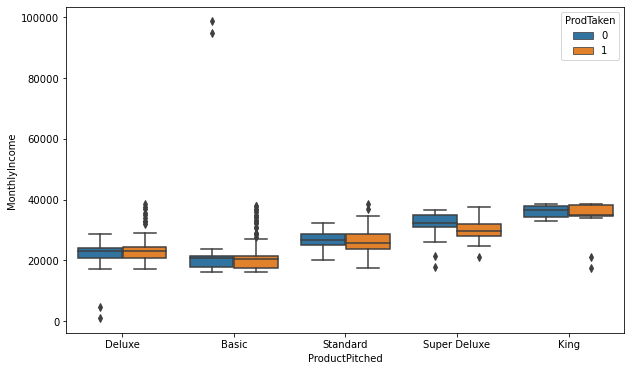

In [89]:
plt.figure(figsize=(10,6))
sns.boxplot(data=data,x='ProductPitched',y='MonthlyIncome',hue='ProdTaken')
plt.show()

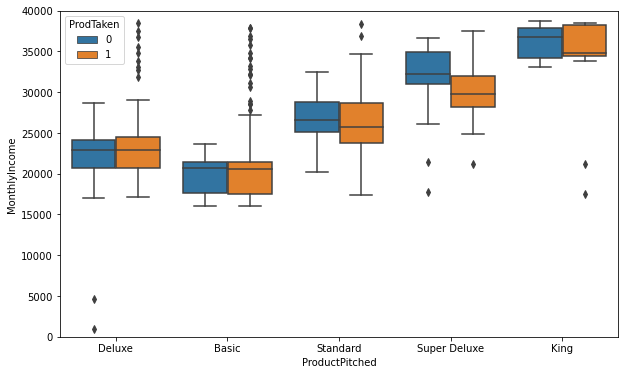

In [90]:
plt.figure(figsize=(10,6))
sns.boxplot(data=data,x='ProductPitched',y='MonthlyIncome',hue='ProdTaken')
plt.ylim(0,40000)
plt.show()

* Among customers offered "Super Deluxe" package, it was observed that the monthly income of customers who purchased the package tended to be lower than those of customers who did not purchase the package.
* Customers who purchase the "Deluxe" package earn slightly higher monthly income than those who do not purchase the Deluxe package.

## Key Observations from EDA

### General

* It was observed that the age group of customers who purchased the package was relatively lower.
* Customers living in city tier 1 were observed to purchase packages relatively less than other customers.
* Overall, the group that purchased the package tended to have slightly longer pitch durations, but customers who experienced very long pitch durations did not purchase the package.
* "Large business" customers purchased relatively more packages than "Small business" or "Salaried workers" customers.
* There was no customer who purchased the package alone or with more than 4 members.
* It was observed that approximately 78% of customers were accompanied by one or more children under 5 years of age.
* Relatively, the "Executive" group purchased the most packages and the "AVP group" purchased the least.
* A tendency to purchase more packages was observed as the number of follow-ups after the pitch increased.
* There was a tendency to purchase more packages as the satisfaction of the pitch increased.
* The variables `ProductPitched` and `Designation` are completely dependent.
* A tendency was observed for customers with passports to purchase packages relatively more than those without passports.
* Unmarried customers purchased relatively more packages than those with married experience.
* Customers who prefer higher-rated hotels tend to purchase more packages.

### Profile of customer who purchased the package
#### Basic
- Designation is "Executive"
- The age of customers who purchased the package tends to be lower than the age of customers who did not purchase the same package.
- Customers living in Tier 3 cities are much more likely to choose to buy than they would otherwise.
- More than half of them have passports.
- Prefer higher-rated hotels.


#### Standard 
- Designation is "Manager"
- Relatively more unaccompanied children under the age of 5.
- pitch satisfaction score is higher than those who did not purchase the same package.

#### Deluxe
- Designation is "Senior Manager"
- Not living in a Tier 2 city.
- Slightly higher monthly income than customers who did not purchase the same package.

#### Super Deluxe
- Designation is "AVP"
- Relatively high percentage of purchases made through company invitations.
- The age of customers who purchased the package tends to be lower than the age of customers who did not purchase the same package.
- Most of the customers who purchased the package are limited to the age of 40-50.
- Not living in a Tier 2 city.
- Relatively fewer followups.
- If the customer does not have a car, the package is not purchased.
- Significantly lower monthly income than customers who did not purchase the same package.

#### King
- Designation is "VP"
- All self-inquired customers.
- Not living in a Tier 2 city.
- All have 3 or more followups.
- The range of points given for purchasing the "King" package is narrow compared to other groups.
- If the customer does not have a car, the package is rarely purchased.
- The duration of pitch is shorter than other groups.

## Data pre-processing after EDA

### Missing value treatment

* Missing values in `Age` and `MonthlyIncome` columns will be replaced with the median by designation.
* Missing values in the remaining columns will be replaced with the overall median value of each column.and the rest will be replaced with the overall median.

#### Age & MonthlyIncome

In [91]:
for feature in ['Age','MonthlyIncome']:
    data[feature]=data.groupby(['Designation'])[feature].apply(lambda x:x.fillna(x.median()))
## binning Age after missing value treatment in Age column
data['Age_bin'] = pd.cut(data['Age'], bins = [0,19, 29, 39, 49, 61], labels = ['under20','20-29', '30-39', '40-49','Above50'])

#### Other columns

In [92]:
#define columns including missing value
columns_with_na = data.columns[data.isnull().any()].tolist()

In [93]:
for feature in columns_with_na:
    data[feature]=data[feature].fillna(data[feature].median())

#### Check

In [94]:
data.isnull().sum()

ProdTaken                   0
Age                         0
TypeofContact               0
CityTier                    0
DurationOfPitch             0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
NumberOfFollowups           0
ProductPitched              0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
NumberOfChildrenVisiting    0
Designation                 0
MonthlyIncome               0
Age_bin                     0
dtype: int64

* No more missing values after missing value treatment.

### Outlier treatment

#### Outlier detection

In [95]:
#IQR defining
Q1 = data.quantile(0.25) # finding the 25th percentile.
Q3 = data.quantile(0.75) # finding the 75th percentile.
IQR = Q3-Q1 # inter quantile range (IQR)
lower = Q1-1.5*IQR # lower whisker
upper = Q3+1.5*IQR # upper whisker

In [96]:
print(lower['MonthlyIncome'])

13054.375


In [97]:
((data.select_dtypes(include=['float64','int64']) < lower) | (data.select_dtypes(include=['float64','int64']) > upper)).sum() / len(data)*100

ProdTaken                   18.869123
Age                          0.000000
CityTier                     0.000000
DurationOfPitch              2.287166
NumberOfPersonVisiting       0.063532
NumberOfFollowups            6.480305
PreferredPropertyStar        0.000000
NumberOfTrips                2.244812
Passport                     0.000000
PitchSatisfactionScore       0.000000
OwnCar                       0.000000
NumberOfChildrenVisiting     0.000000
MonthlyIncome                7.666243
dtype: float64

* The `ProTaken` column is not suitable for outlier treatment because it is a dependent variable and is actually a categorical variable.
* Since `DurationOfPitch` and `NumberOfFollowups` are information that cannot be obtained from new customers, they are independent variables that are not suitable for constructing a model. Therefore, it was excluded from outlier treatment.
* In `NumberOfPersonVisiting`, 5 persons were included in the outlier and there was no significant difference from the 4 persons not included in the outlier, so they were excluded from outlier treatment.
* Finally, outlier treatment was performed in `NumberOfTrips` and `MonthlyIncome` columns.

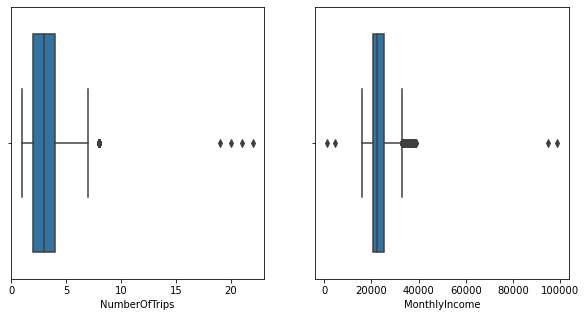

In [98]:
columns_with_outliers = ['NumberOfTrips','MonthlyIncome']
fig,ax = plt.subplots(1,2,figsize=(10,5))
for i,feature in enumerate(columns_with_outliers):
    sns.boxplot(data=data,x=feature,ax=ax[i])
plt.show()

#### Outlier treatment

In [99]:
# Outlier replacing with lower/upper whisker
for feature in columns_with_outliers:
    feature_lower = lower[feature]
    feature_upper = upper[feature]
    data[feature] = np.where(data[feature]>feature_upper,feature_upper,
                           np.where(data[feature]<feature_lower,feature_lower,data[feature])) ## replacing outlier to upper/lower whiskers
    

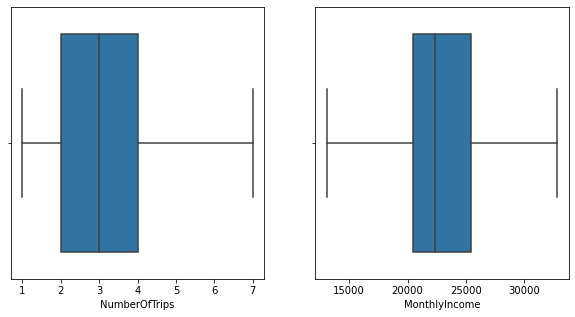

In [100]:
fig,ax = plt.subplots(1,2,figsize=(10,5))
for i,feature in enumerate(columns_with_outliers):
    sns.boxplot(data=data,x=feature,ax=ax[i])
plt.show()

## Creating training and test set

* Since it is necessary to build a model that predicts whether or not to purchase a package for new customers, information that cannot be obtained prior to product sales is excluded.


### Training set and Test set

In [101]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4722 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   ProdTaken                 4722 non-null   int64   
 1   Age                       4722 non-null   float64 
 2   TypeofContact             4722 non-null   object  
 3   CityTier                  4722 non-null   int64   
 4   DurationOfPitch           4722 non-null   float64 
 5   Occupation                4722 non-null   object  
 6   Gender                    4722 non-null   object  
 7   NumberOfPersonVisiting    4722 non-null   int64   
 8   NumberOfFollowups         4722 non-null   float64 
 9   ProductPitched            4722 non-null   object  
 10  PreferredPropertyStar     4722 non-null   float64 
 11  MaritalStatus             4722 non-null   object  
 12  NumberOfTrips             4722 non-null   float64 
 13  Passport                  4722 non-null   int64 

In [102]:
X_raw = data.drop(['ProdTaken','DurationOfPitch','NumberOfFollowups','ProductPitched','PitchSatisfactionScore','Age_bin'],axis=1)
X = pd.get_dummies(X_raw,drop_first=True)
y = data['ProdTaken']

In [103]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1,stratify=y ## to maintain original distribution of classes in target variable.
)
print(X_train.shape, X_test.shape)

(3305, 20) (1417, 20)


In [104]:
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Percentage of classes in training set:
0    0.811195
1    0.188805
Name: ProdTaken, dtype: float64
Percentage of classes in test set:
0    0.811574
1    0.188426
Name: ProdTaken, dtype: float64


## Model evaluation criterion

### Model can make wrong predictions as:
 
1. Predicting a customer will not purchase a travel package but in reality the customer would purchase it. - False Negative
2. Predicting a customer will purchase a travel package but in reality the customer would not purchase it. - False Positive

### Which case is more important? 

* Predicting that a customer will not purchase a package but the customer purchase it i.e. losing opportunity to sell a package and money.
* Need to maximize Recall.


## Bagging

### Functions

In [105]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn


def model_performance_classification_sklearn(model, predictors, target, threshold=0.5):
    """
    Function to compute different metrics, based on the threshold specified, to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    # predicting using the independent variables
    pred_prob = model.predict_proba(predictors)[:, 1]
    pred_thres = pred_prob > threshold
    pred = np.round(pred_thres)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [106]:
# defining a function to plot the confusion_matrix of a classification model built using sklearn
def confusion_matrix_sklearn(model, predictors, target, threshold=0.5):
    """
    To plot the confusion_matrix, based on the threshold specified, with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """
    pred_prob = model.predict_proba(predictors)[:, 1]
    pred_thres = pred_prob > threshold
    y_pred = np.round(pred_thres)

    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

### Bagging Classifier

#### Model building

In [107]:
bagging = BaggingClassifier(random_state=1)
bagging.fit(X_train,y_train)

BaggingClassifier(random_state=1)

#### Performance on training set

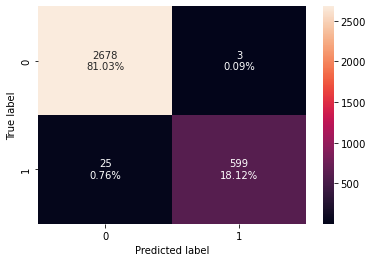

In [108]:
confusion_matrix_sklearn(bagging, X_train, y_train)

In [109]:
bagging_model_train_perf=model_performance_classification_sklearn(bagging, X_train, y_train)
print("Training performance \n",bagging_model_train_perf)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.991528  0.959936   0.995017  0.977162


#### Performance on test set

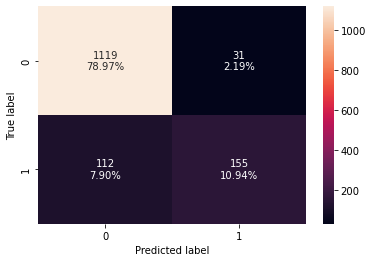

In [110]:
confusion_matrix_sklearn(bagging, X_test, y_test)

In [111]:
bagging_model_test_perf=model_performance_classification_sklearn(bagging, X_test, y_test)
print("Testing performance \n",bagging_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision        F1
0  0.899083  0.580524   0.833333  0.684327


* Bagging classifier is over-fitted.
* Bagging classifier is performing poorly on the test set in terms of Recall.

#### Bagging Classifier with weighted decision tree

In [112]:
bagging_wt = BaggingClassifier(base_estimator=DecisionTreeClassifier(criterion='gini',class_weight={0:0.19,1:0.81},random_state=1),random_state=1)
bagging_wt.fit(X_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight={0: 0.19,
                                                                      1: 0.81},
                                                        random_state=1),
                  random_state=1)

#### Performance of Bagging Classifier with weighted decision tree on training set

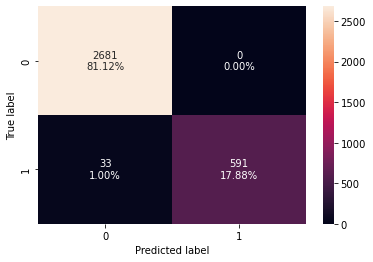

In [113]:
confusion_matrix_sklearn(bagging_wt,X_train,y_train)

In [114]:
bagging_wt_model_train_perf=model_performance_classification_sklearn(bagging_wt,X_train,y_train)
print("Training performance \n",bagging_wt_model_train_perf)

Training performance 
    Accuracy    Recall  Precision       F1
0  0.990015  0.947115        1.0  0.97284


#### Performance of Bagging Classifier with weighted decision tree on test set

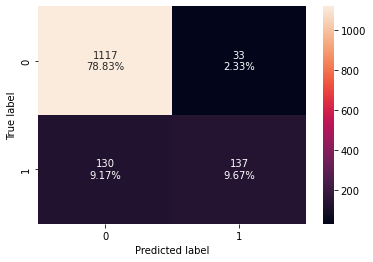

In [115]:
confusion_matrix_sklearn(bagging_wt,X_test,y_test)

In [116]:
bagging_wt_model_test_perf=model_performance_classification_sklearn(bagging_wt, X_test, y_test)
print("Testing performance \n",bagging_wt_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision        F1
0  0.884968  0.513109   0.805882  0.627002


* Bagging classifier with a weighted decision tree is giving good Accuracy and Prediction, but poor Recall

#### Tuning Bagging Classifier using GridSearchCV

In [117]:
# grid search for bagging classifier
cl1 = DecisionTreeClassifier(random_state=1)
param_grid = {'base_estimator':[cl1],
              'n_estimators':[5,10,30,50,100],
              'max_features': [0.7,0.8,0.9,1]
             }

grid = GridSearchCV(BaggingClassifier(random_state=1,bootstrap=True), param_grid=param_grid, scoring = 'recall', cv = 5)
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=BaggingClassifier(random_state=1),
             param_grid={'base_estimator': [DecisionTreeClassifier(random_state=1)],
                         'max_features': [0.7, 0.8, 0.9, 1],
                         'n_estimators': [5, 10, 30, 50, 100]},
             scoring='recall')

In [118]:
## getting the best estimator
bagging_tuned  = grid.best_estimator_
bagging_tuned.fit(X_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=1),
                  max_features=0.9, n_estimators=100, random_state=1)

#### Performance on training set after hyperparameter tuning

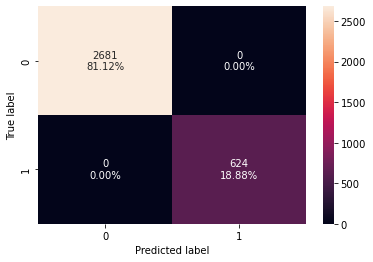

In [119]:
confusion_matrix_sklearn(bagging_tuned, X_train,y_train)

In [120]:
bagging_tuned_model_train_perf=model_performance_classification_sklearn(bagging_tuned, X_train,y_train)
print("Training performance \n",bagging_tuned_model_train_perf)

Training performance 
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0


#### Performance on test set after hyperparameter tuning

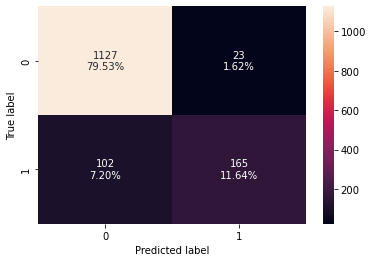

In [121]:
confusion_matrix_sklearn(bagging_tuned, X_test,y_test)

In [122]:
bagging_tuned_model_test_perf=model_performance_classification_sklearn(bagging_tuned, X_test, y_test)
print("Testing performance \n",bagging_tuned_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision        F1
0  0.911785  0.617978    0.87766  0.725275


* The model still overfits on the training set, but increases the recall compared to the previous model on the test set.


### Random Forest

#### Model building

In [123]:
rf = RandomForestClassifier(random_state=1)
rf.fit(X_train,y_train)

RandomForestClassifier(random_state=1)

#### Performance on training set

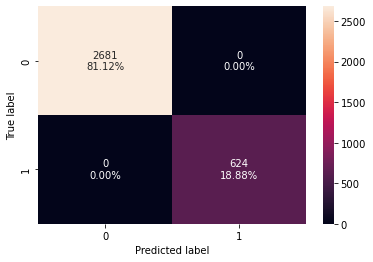

In [124]:
confusion_matrix_sklearn(rf,X_train,y_train)

In [125]:
rf_model_train_perf=model_performance_classification_sklearn(rf,X_train,y_train)
print("Training performance \n",rf_model_train_perf)

Training performance 
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0


#### Performance on test set

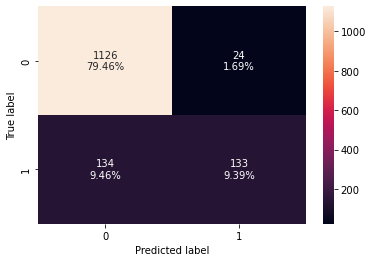

In [126]:
confusion_matrix_sklearn(rf,X_test,y_test)

In [127]:
rf_model_test_perf=model_performance_classification_sklearn(rf,X_test,y_test)
print("Testing performance \n",rf_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision        F1
0  0.888497  0.498127   0.847134  0.627358


* Random Forest is giving good Accuracy and Prediction, but poor Recall

#### Random Forest with class weights

In [128]:
rf_wt = RandomForestClassifier(class_weight={0:0.19,1:0.81}, random_state=1)
rf_wt.fit(X_train,y_train)

RandomForestClassifier(class_weight={0: 0.19, 1: 0.81}, random_state=1)

#### Performance of weighted Random Forest on training set

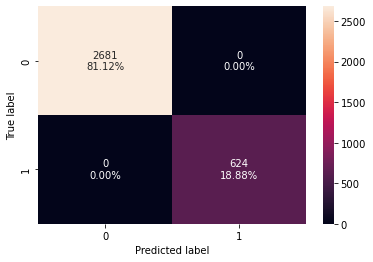

In [129]:
confusion_matrix_sklearn(rf_wt, X_train,y_train)

In [130]:
rf_wt_model_train_perf=model_performance_classification_sklearn(rf_wt, X_train,y_train)
print("Training performance \n",rf_wt_model_train_perf)

Training performance 
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0


#### Performance of weighted Random Forest on test set

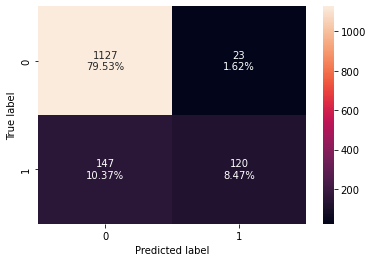

In [131]:
confusion_matrix_sklearn(rf_wt, X_test,y_test)

In [132]:
rf_wt_model_test_perf=model_performance_classification_sklearn(rf_wt, X_test,y_test)
print("Testing performance \n",rf_wt_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision        F1
0  0.880028  0.449438   0.839161  0.585366


* The metrics of the weighted random forest did not improve, but rather got worse compared to the unweighted random forest.

#### Tuning Random Forest

In [133]:
# Choose the type of classifier. 
rf_tuned = RandomForestClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {  
        "n_estimators": [50,100,150,200],
        "max_features": [0.7,0.8,0.9],
        "max_samples": [0.7,0.8,0.9],
}

# Run the grid search
grid_obj = GridSearchCV(rf_tuned, parameters, scoring='recall',cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
rf_tuned.fit(X_train, y_train)

RandomForestClassifier(max_features=0.9, max_samples=0.9, random_state=1)

#### Performance on training set after hyperparameter tuning

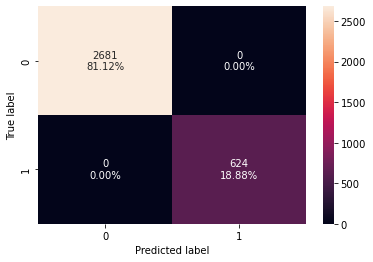

In [134]:
confusion_matrix_sklearn(rf_tuned, X_train,y_train)

In [135]:
rf_tuned_model_train_perf=model_performance_classification_sklearn(rf_tuned, X_train,y_train)
print("Training performance \n",rf_tuned_model_train_perf)

Training performance 
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0


#### Performance on test set after hyperparameter tuning

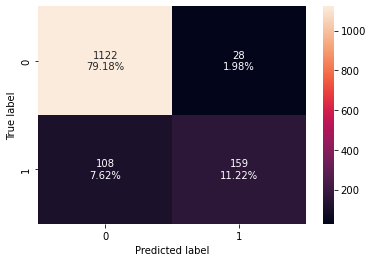

In [136]:
confusion_matrix_sklearn(rf_tuned, X_test,y_test)

In [137]:
rf_tuned_model_test_perf=model_performance_classification_sklearn(rf_tuned, X_test, y_test)
print("Testing performance \n",rf_tuned_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision        F1
0  0.904023  0.595506   0.850267  0.700441


* Random Forest after tuning has given better performance on test set compared to un-tuned Random Forest although it is still overfitting on training set.

### Decision Tree

#### Model building

In [138]:
dt = DecisionTreeClassifier(criterion='gini',class_weight={0:0.19,1:0.81},random_state=1) # use class_weight because of biased y.

In [139]:
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.19, 1: 0.81}, random_state=1)

#### Performance on training set

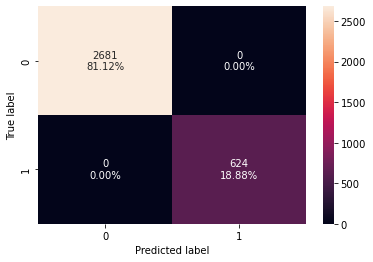

In [140]:
confusion_matrix_sklearn(dt, X_train, y_train)

In [141]:
dt_model_train_perf=model_performance_classification_sklearn(dt, X_train, y_train)
print("Testing performance \n",dt_model_train_perf)

Testing performance 
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0


#### Performance on test set

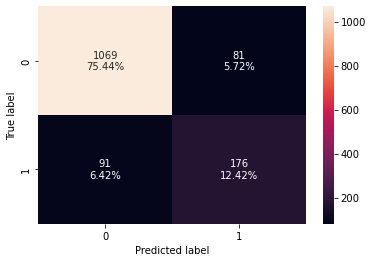

In [142]:
confusion_matrix_sklearn(dt, X_test, y_test)

In [143]:
dt_model_test_perf=model_performance_classification_sklearn(dt, X_test, y_test)
print("Testing performance \n",dt_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision        F1
0  0.878617  0.659176   0.684825  0.671756


* Naturally, the Decision Tree model with default parameters is over-fitted.
* Recall is about 0.7 and it's not too bad, but it needs improvement.

#### Tuning Decision Tree using GridSearchCV

In [144]:
# Choose the type of classifier. 
dt_tuned = DecisionTreeClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {'max_depth': np.arange(2,30), 
              'min_samples_leaf': [1, 2, 5, 7, 10],
              'max_leaf_nodes' : [2, 3, 5, 10,15, None],
              'min_impurity_decrease': [0.0001,0.001,0.01,0.1]
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(dt_tuned, parameters, scoring=scorer)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
dt_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
dt_tuned.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=18, min_impurity_decrease=0.0001,
                       random_state=1)

#### Performance on training set after hyperparameter tuning

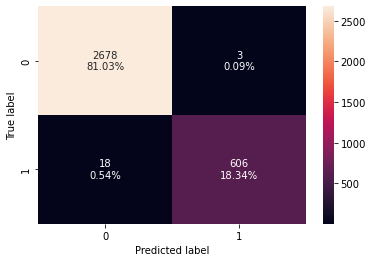

In [145]:
confusion_matrix_sklearn(dt_tuned, X_train,y_train)

In [146]:
dt_tuned_model_train_perf=model_performance_classification_sklearn(dt_tuned, X_train,y_train)
print("Training performance \n",dt_tuned_model_train_perf)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.993646  0.971154   0.995074  0.982968


#### Performance on test set after hyperparameter tuning

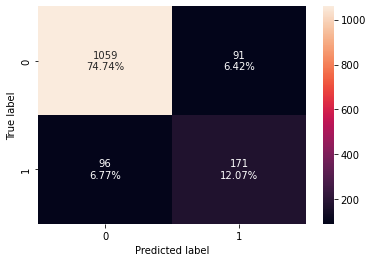

In [147]:
confusion_matrix_sklearn(dt_tuned, X_test,y_test)

In [148]:
dt_tuned_model_test_perf=model_performance_classification_sklearn(dt_tuned, X_test,y_test)
print("Testing performance \n",dt_tuned_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision        F1
0  0.868031  0.640449   0.652672  0.646503


* Overfitting in decision tree has slightly reduced but the recall has also reduced.

#### Cost complexity pruning

In [149]:
clf = DecisionTreeClassifier(random_state=1, class_weight={0: 0.19, 1: 0.81},)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
pd.DataFrame(path)

,ccp_alphas,impurities
0,0.000000e+00,-3.603228e-16
1,3.117897e-19,-3.600110e-16
2,3.741477e-19,-3.596369e-16
3,3.741477e-19,-3.592627e-16
4,3.741477e-19,-3.588886e-16
...,...,...
280,1.126693e-02,4.017923e-01
281,1.251270e-02,4.143050e-01
282,1.573390e-02,4.300389e-01
283,1.637038e-02,4.464093e-01


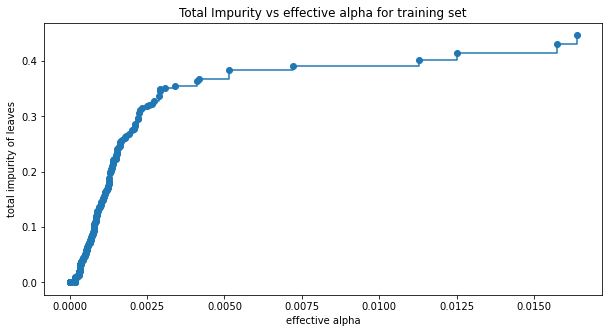

In [150]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

In [151]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(
        random_state=1, ccp_alpha=ccp_alpha, class_weight={0: 0.19, 1: 0.81}
    )
    clf.fit(X_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.05358314957676885


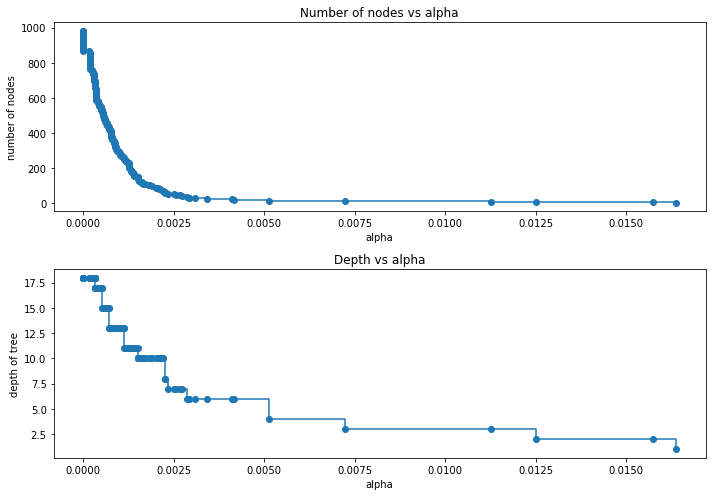

In [152]:
# The last element in clfs and ccp_alphas were removed because it is the trivial tree with only one node.
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]


node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

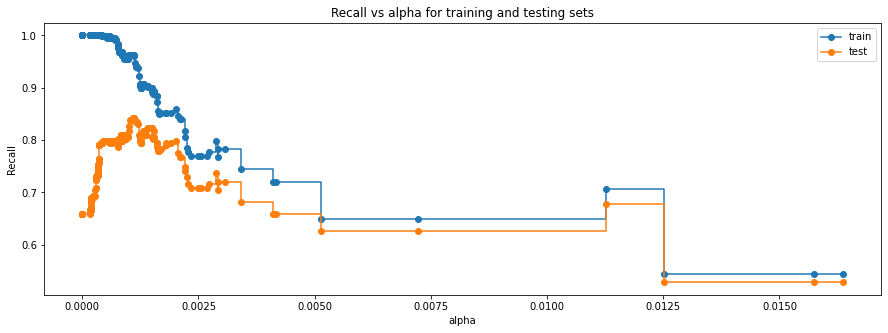

In [153]:
# Recall vs alpha for training and testing sets

recall_train = []
recall_test = []

for clf in clfs:
    pred_train = clf.predict(X_train)
    pred_test = clf.predict(X_test)
    # Recall
    recall_train_value = recall_score(y_train, pred_train)
    recall_test_value = recall_score(y_test, pred_test)
    recall_train.append(recall_train_value)
    recall_test.append(recall_test_value)

fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(
    ccp_alphas, recall_train, marker="o", label="train", drawstyle="steps-post",
)
ax.plot(ccp_alphas, recall_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [154]:
# creating the model where we get highest train and test f1
index_pruned_model = np.argmax(recall_test)
dt_pruned = clfs[index_pruned_model]
print(dt_pruned)

DecisionTreeClassifier(ccp_alpha=0.0010878080310587463,
                       class_weight={0: 0.19, 1: 0.81}, random_state=1)


In [155]:
dt_pruned.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0010878080310587463,
                       class_weight={0: 0.19, 1: 0.81}, random_state=1)

#### Performance on training set with optimal ccp_alpha

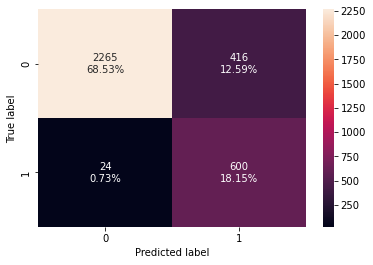

In [156]:
confusion_matrix_sklearn(dt_pruned, X_train, y_train)

In [157]:
dt_pruned_model_train_perf = model_performance_classification_sklearn(
    dt_pruned, X_train, y_train
)
print("Training performance \n",dt_pruned_model_train_perf)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.866868  0.961538   0.590551  0.731707


#### Performance on test set with optimal ccp_alpha

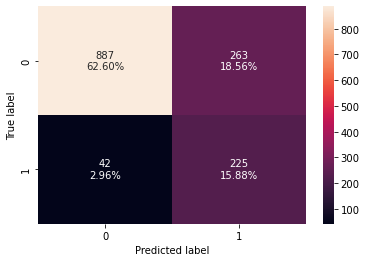

In [158]:
confusion_matrix_sklearn(dt_pruned, X_test, y_test)

In [159]:
dt_pruned_model_test_perf = model_performance_classification_sklearn(
    dt_pruned, X_test, y_test
)
print("Testing performance \n",dt_pruned_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision        F1
0  0.784757  0.842697   0.461066  0.596026


* Reduced overfitting of decision trees and decreased Precision but increased Recall.

## Boosting

### AdaBoost Classifier

#### Model building

In [160]:
#Fitting the model
abc = AdaBoostClassifier(random_state=1)
abc.fit(X_train,y_train)

AdaBoostClassifier(random_state=1)

#### Performance on training set

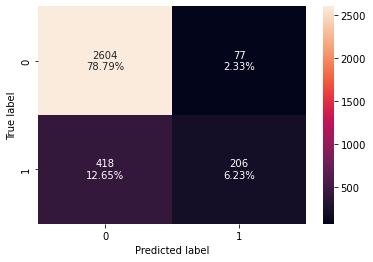

In [161]:
confusion_matrix_sklearn(abc,X_train,y_train)

In [162]:
abc_model_train_perf=model_performance_classification_sklearn(abc,X_train,y_train)
print("Training performance \n",abc_model_train_perf)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.850227  0.330128   0.727915  0.454245


#### Performance on test set

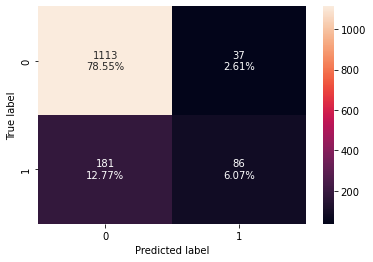

In [163]:
confusion_matrix_sklearn(abc,X_test,y_test)

In [164]:
abc_model_test_perf=model_performance_classification_sklearn(abc,X_test,y_test)
print("Testing performance \n",abc_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision        F1
0  0.846154  0.322097   0.699187  0.441026


* AdaBoost classifier is not overfitting the training set, but gives very poor Recall on both training and test set.

#### Hyperparameter Tuning

In [165]:
# Choose the type of classifier. 
abc_tuned = AdaBoostClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    #Let's try different max_depth for base_estimator
    "base_estimator":[DecisionTreeClassifier(max_depth=1),DecisionTreeClassifier(max_depth=2),
                      DecisionTreeClassifier(max_depth=3)],
    "n_estimators": [10,50,100,150],
    "learning_rate":np.arange(0.1,2,0.1)
}

# Type of scoring used to compare parameter  combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(abc_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
abc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
abc_tuned.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3),
                   learning_rate=0.9, n_estimators=150, random_state=1)

#### Performance on training set after hyperparameter tuning

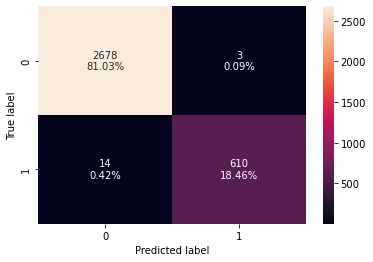

In [166]:
confusion_matrix_sklearn(abc_tuned,X_train,y_train)

In [167]:
abc_tuned_model_train_perf=model_performance_classification_sklearn(abc_tuned,X_train,y_train)
print("Training performance \n",abc_tuned_model_train_perf)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.994856  0.977564   0.995106  0.986257


#### Performance on test set after hyperparameter tuning

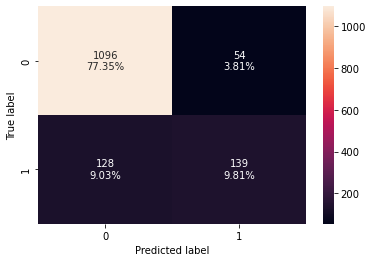

In [168]:
confusion_matrix_sklearn(abc_tuned,X_test,y_test)

In [169]:
abc_tuned_model_test_perf=model_performance_classification_sklearn(abc_tuned,X_test,y_test)
print("Testing performance \n",abc_tuned_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision        F1
0   0.87156  0.520599   0.720207  0.604348


* There has been some improvement in model performance on test set, but the Recall is still not good.
* Tuned model is overfitting the training set whereas un-tuned model is not overfitting the training set.

### Gradient Boosting Classifier

#### Model building

In [170]:
#Fitting the model
gbc = GradientBoostingClassifier(random_state=1)
gbc.fit(X_train,y_train)

GradientBoostingClassifier(random_state=1)

#### Performance on training set

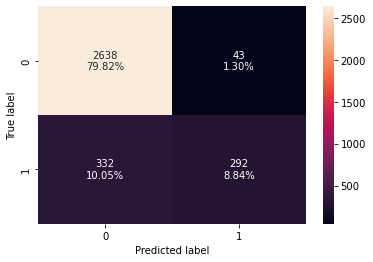

In [171]:
confusion_matrix_sklearn(gbc,X_train,y_train)

In [172]:
gbc_model_train_perf=model_performance_classification_sklearn(gbc,X_train,y_train)
print("Training performance \n",gbc_model_train_perf)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.886536  0.467949   0.871642  0.608968


#### Performance on test set

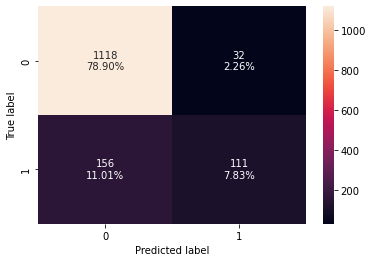

In [173]:
confusion_matrix_sklearn(gbc,X_test,y_test)

In [174]:
gbc_model_test_perf=model_performance_classification_sklearn(gbc,X_test,y_test)
print("Testing performance \n",gbc_model_test_perf)

Testing performance 
    Accuracy   Recall  Precision        F1
0  0.867325  0.41573   0.776224  0.541463


* GradientBoost classifier is not overfitting the training set, but gives poor Recall on both training and test set.

#### Hyperparameter Tuning

In [175]:
# Choose the type of classifier. 
gbc_tuned = GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),random_state=1)

# Grid of parameters to choose from
parameters = {
    "n_estimators": [10,50,100,150],
    "subsample":[0.8,0.9,1],
    "max_features":[0.7,0.8,0.9,1]
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(gbc_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
gbc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
gbc_tuned.fit(X_train, y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           max_features=0.8, n_estimators=150, random_state=1,
                           subsample=1)

#### Performance on training set after hyperparameter tuning

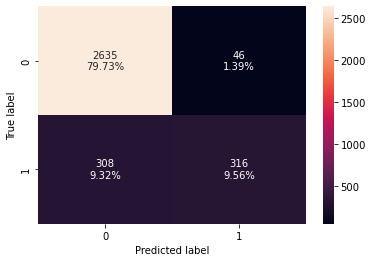

In [176]:
confusion_matrix_sklearn(gbc_tuned,X_train,y_train)

In [177]:
gbc_tuned_model_train_perf=model_performance_classification_sklearn(gbc_tuned,X_train,y_train)
print("Training performance \n",gbc_tuned_model_train_perf)

Training performance 
    Accuracy   Recall  Precision        F1
0   0.89289  0.50641   0.872928  0.640974


#### Performance on test set after hyperparameter tuning

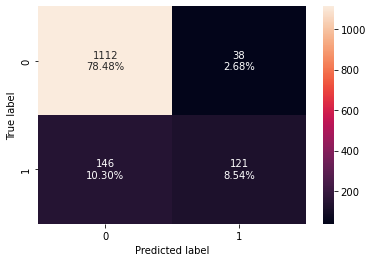

In [178]:
confusion_matrix_sklearn(gbc_tuned,X_test,y_test)

In [179]:
gbc_tuned_model_test_perf=model_performance_classification_sklearn(gbc_tuned,X_test,y_test)
print("Testing performance \n",gbc_tuned_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision        F1
0  0.870148  0.453184   0.761006  0.568075


* There was not much improvement in model performance compared to before tuning.

### XGBoost Classifier

#### Model building

In [180]:
#Fitting the model
xgb = XGBClassifier(random_state=1, eval_metric='logloss')
xgb.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='logloss', gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_to_onehot=4, max_delta_step=0, max_depth=6,
              max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=1,
              reg_alpha=0, reg_lambda=1, ...)

#### Performance on training set

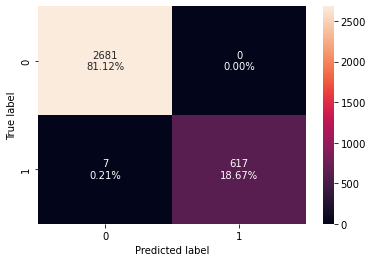

In [181]:
confusion_matrix_sklearn(xgb,X_train,y_train)

In [182]:
xgb_model_train_perf=model_performance_classification_sklearn(xgb,X_train,y_train)
print("Training performance:\n",xgb_model_train_perf)

Training performance:
    Accuracy    Recall  Precision        F1
0  0.997882  0.988782        1.0  0.994359


#### Performance on test set

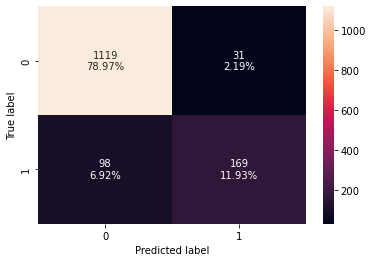

In [183]:
confusion_matrix_sklearn(xgb,X_test,y_test)

In [184]:
xgb_model_test_perf=model_performance_classification_sklearn(xgb,X_test,y_test)
print("Testing performance:\n",xgb_model_test_perf)

Testing performance:
    Accuracy    Recall  Precision        F1
0  0.908963  0.632959      0.845  0.723769


* XGBoost Classifier is overfitting the training data.

#### Hyperparameter Tuning

In [185]:
# Choose the type of classifier. 
xgb_tuned = XGBClassifier(random_state=1, eval_metric='logloss')

# Grid of parameters to choose from
parameters = {
    "n_estimators": [10,30,50,70],
    "scale_pos_weight":[1,2,5],
    "subsample":[0.7,0.9,1],
    "learning_rate":[0.05, 0.1,0.2],
    "colsample_bytree":[0.7,0.9,1],
    "colsample_bylevel":[0.5,0.7,1]
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(xgb_tuned, parameters,scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
xgb_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
xgb_tuned.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=0.5, colsample_bynode=1, colsample_bytree=0.7,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='logloss', gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.05, max_bin=256,
              max_cat_to_onehot=4, max_delta_step=0, max_depth=6, max_leaves=0,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=70, n_jobs=0, num_parallel_tree=1, predictor='auto',
              random_state=1, reg_alpha=0, reg_lambda=1, ...)

#### Performance on training set after hyperparameter tuning

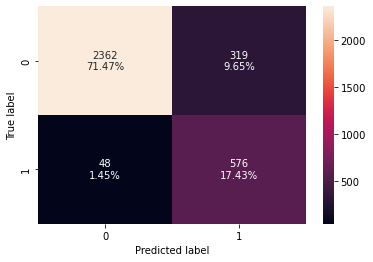

In [186]:
confusion_matrix_sklearn(xgb_tuned,X_train,y_train)

In [187]:
xgb_tuned_model_train_perf=model_performance_classification_sklearn(xgb_tuned,X_train,y_train)
print("Training performance:\n",xgb_tuned_model_train_perf)

Training performance:
    Accuracy    Recall  Precision        F1
0  0.888956  0.923077   0.643575  0.758394


#### Performance on test set after hyperparameter tuning

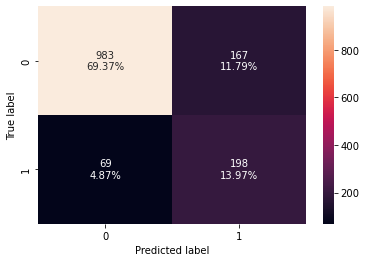

In [188]:
confusion_matrix_sklearn(xgb_tuned,X_test,y_test)

In [189]:
xgb_tuned_model_test_perf=model_performance_classification_sklearn(xgb_tuned,X_test,y_test)
print("Testing performance:\n",xgb_tuned_model_test_perf)

Testing performance:
    Accuracy    Recall  Precision        F1
0  0.833451  0.741573   0.542466  0.626582


* Precision decreased after hyperparameter tuning, but overfitting decreased and Recall increased.

### Stacking Classifier

#### Model building

In [190]:
estimators = [('Random Forest',rf_tuned), ('Gradient Boosting',gbc_tuned), ('Decision Tree',dt_pruned)]

final_estimator = xgb_tuned

stacking_classifier= StackingClassifier(estimators=estimators,final_estimator=final_estimator)

stacking_classifier.fit(X_train,y_train)

StackingClassifier(estimators=[('Random Forest',
                                RandomForestClassifier(max_features=0.9,
                                                       max_samples=0.9,
                                                       random_state=1)),
                               ('Gradient Boosting',
                                GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                                                           max_features=0.8,
                                                           n_estimators=150,
                                                           random_state=1,
                                                           subsample=1)),
                               ('Decision Tree',
                                DecisionTreeClassifier(ccp_alpha=0.0010878080310587463,
                                                       class_wei...
                                                 eval_metric='logloss', gamma=0,
                                                 gpu_id=-1,
                                                 grow_policy='depthwise',
                                                 importance_type=None,
                                                 interaction_constraints='',
                                                 learning_rate=0.05,
                                                 max_bin=256,
                                                 max_cat_to_onehot=4,
                                                 max_delta_step=0, max_depth=6,
                                                 max_leaves=0,
                                                 min_child_weight=1,
                                                 missing=nan,
                                                 monotone_constraints='()',
                                                 n_estimators=70, n_jobs=0,
                                                 num_parallel_tree=1,
                                                 predictor='auto',
                                                 random_state=1, reg_alpha=0,
                                                 reg_lambda=1, ...))

#### Performance on training set

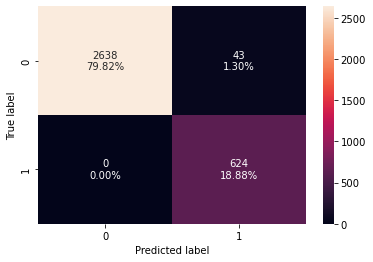

In [191]:
confusion_matrix_sklearn(stacking_classifier,X_train,y_train)

In [192]:
stacking_classifier_train_perf=model_performance_classification_sklearn(stacking_classifier,X_train,y_train)
print("Training performance:\n",stacking_classifier_train_perf)

Training performance:
    Accuracy  Recall  Precision        F1
0  0.986989     1.0   0.935532  0.966692


#### Performance on test set

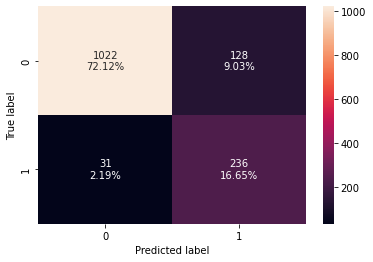

In [193]:
confusion_matrix_sklearn(stacking_classifier,X_test,y_test)

In [194]:
stacking_classifier_test_perf=model_performance_classification_sklearn(stacking_classifier,X_test,y_test)
print("Testing performance:\n",stacking_classifier_test_perf)

Testing performance:
    Accuracy    Recall  Precision        F1
0  0.887791  0.883895   0.648352  0.748019


* Although the model is still overfitting the training data, the model performs better than other models. 

## Comparing all models

### Training performance comparison

In [195]:

models_train_comp_df = pd.concat(
    [bagging_model_train_perf.T,bagging_tuned_model_train_perf.T,
     rf_model_train_perf.T,rf_wt_model_train_perf.T,rf_tuned_model_train_perf.T,
     dt_model_train_perf.T,dt_tuned_model_train_perf.T,dt_pruned_model_train_perf.T,
     abc_model_train_perf.T,abc_tuned_model_train_perf.T,
     gbc_model_train_perf.T,gbc_tuned_model_train_perf.T,
     xgb_model_train_perf.T,xgb_tuned_model_train_perf.T,
     stacking_classifier_train_perf.T
     ],
    axis=1,
)

models_train_comp_df.columns = [
    "Bagging Classifier",
    "Bagging Classifier Tuned",
    "Random Forest",
    "Random Forest Weighted",
    "Random Forest Tuned",
    "Decision Tree",
    "Decision Tree Tuned",
    "Decision Tree Pruned",
    "Adaboost Classifier",
    "Adabosst Classifier Tuned",
    "Gradient Boost Classifier",
    "Gradient Boost Classifier Tuned",
    "XGBoost Classifier",
    "XGBoost Classifier Tuned",
    "Stacking Classifier"]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Bagging Classifier,Bagging Classifier Tuned,Random Forest,Random Forest Weighted,Random Forest Tuned,Decision Tree,Decision Tree Tuned,Decision Tree Pruned,Adaboost Classifier,Adabosst Classifier Tuned,Gradient Boost Classifier,Gradient Boost Classifier Tuned,XGBoost Classifier,XGBoost Classifier Tuned,Stacking Classifier
Accuracy,0.991528,1.0,1.0,1.0,1.0,1.0,0.993646,0.866868,0.850227,0.994856,0.886536,0.892890,0.997882,0.888956,0.986989
Recall,0.959936,1.0,1.0,1.0,1.0,1.0,0.971154,0.961538,0.330128,0.977564,0.467949,0.506410,0.988782,0.923077,1.000000
Precision,0.995017,1.0,1.0,1.0,1.0,1.0,0.995074,0.590551,0.727915,0.995106,0.871642,0.872928,1.000000,0.643575,0.935532
F1,0.977162,1.0,1.0,1.0,1.0,1.0,0.982968,0.731707,0.454245,0.986257,0.608968,0.640974,0.994359,0.758394,0.966692


### Test performance comparison

In [196]:

models_test_comp_df = pd.concat(
    [bagging_model_test_perf.T,bagging_tuned_model_test_perf.T,
     rf_model_test_perf.T,rf_wt_model_test_perf.T,rf_tuned_model_test_perf.T,
     dt_model_test_perf.T,dt_tuned_model_test_perf.T,dt_pruned_model_test_perf.T,
     abc_model_test_perf.T,abc_tuned_model_test_perf.T,
     gbc_model_test_perf.T,gbc_tuned_model_test_perf.T,
     xgb_model_test_perf.T,xgb_tuned_model_test_perf.T,
     stacking_classifier_test_perf.T
     ],
    axis=1,
)

models_test_comp_df.columns = [
    "Bagging Classifier",
    "Bagging Classifier Tuned",
    "Random Forest",
    "Random Forest Weighted",
    "Random Forest Tuned",
    "Decision Tree",
    "Decision Tree Tuned",
    "Decision Tree Pruned",    
    "Adaboost Classifier",
    "Adabosst Classifier Tuned",
    "Gradient Boost Classifier",
    "Gradient Boost Classifier Tuned",
    "XGBoost Classifier",
    "XGBoost Classifier Tuned",
    "Stacking Classifier"]
print("Test performance comparison:")
models_test_comp_df

Test performance comparison:


,Bagging Classifier,Bagging Classifier Tuned,Random Forest,Random Forest Weighted,Random Forest Tuned,Decision Tree,Decision Tree Tuned,Decision Tree Pruned,Adaboost Classifier,Adabosst Classifier Tuned,Gradient Boost Classifier,Gradient Boost Classifier Tuned,XGBoost Classifier,XGBoost Classifier Tuned,Stacking Classifier
Accuracy,0.899083,0.911785,0.888497,0.880028,0.904023,0.878617,0.868031,0.784757,0.846154,0.871560,0.867325,0.870148,0.908963,0.833451,0.887791
Recall,0.580524,0.617978,0.498127,0.449438,0.595506,0.659176,0.640449,0.842697,0.322097,0.520599,0.415730,0.453184,0.632959,0.741573,0.883895
Precision,0.833333,0.877660,0.847134,0.839161,0.850267,0.684825,0.652672,0.461066,0.699187,0.720207,0.776224,0.761006,0.845000,0.542466,0.648352
F1,0.684327,0.725275,0.627358,0.585366,0.700441,0.671756,0.646503,0.596026,0.441026,0.604348,0.541463,0.568075,0.723769,0.626582,0.748019


* The un-tuned AdaBoost Classifier was the least overfitted.
* Considering the Recall and Accuracy of the test set, the Stacking Classifier showed the best performance, followed by the tuned XGBoost Classifier and the pruned Decision Tree.


## Feature importance on pruned Decision Tree

* The pruned Decision Tree showed the best performance among models that can investigate feature importance.

### Feature importance

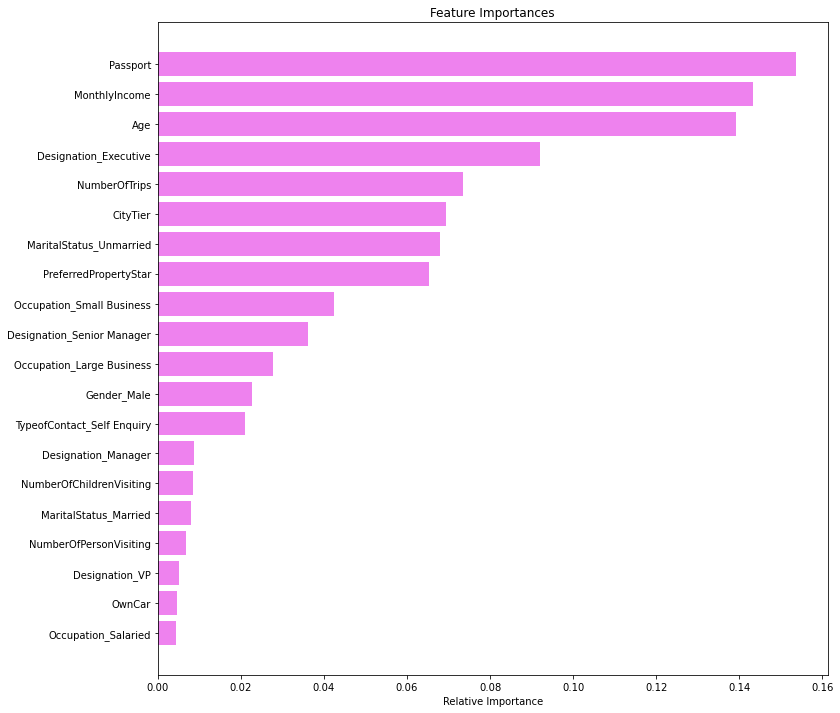

In [197]:
feature_names = X_train.columns
importances = dt_pruned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

* According to the model, the three most important factors determining whether to purchase a package are, in order of importance, age, monthly income, and passport status.

### Visualizing the Decision Tree

In [198]:
from sklearn import tree

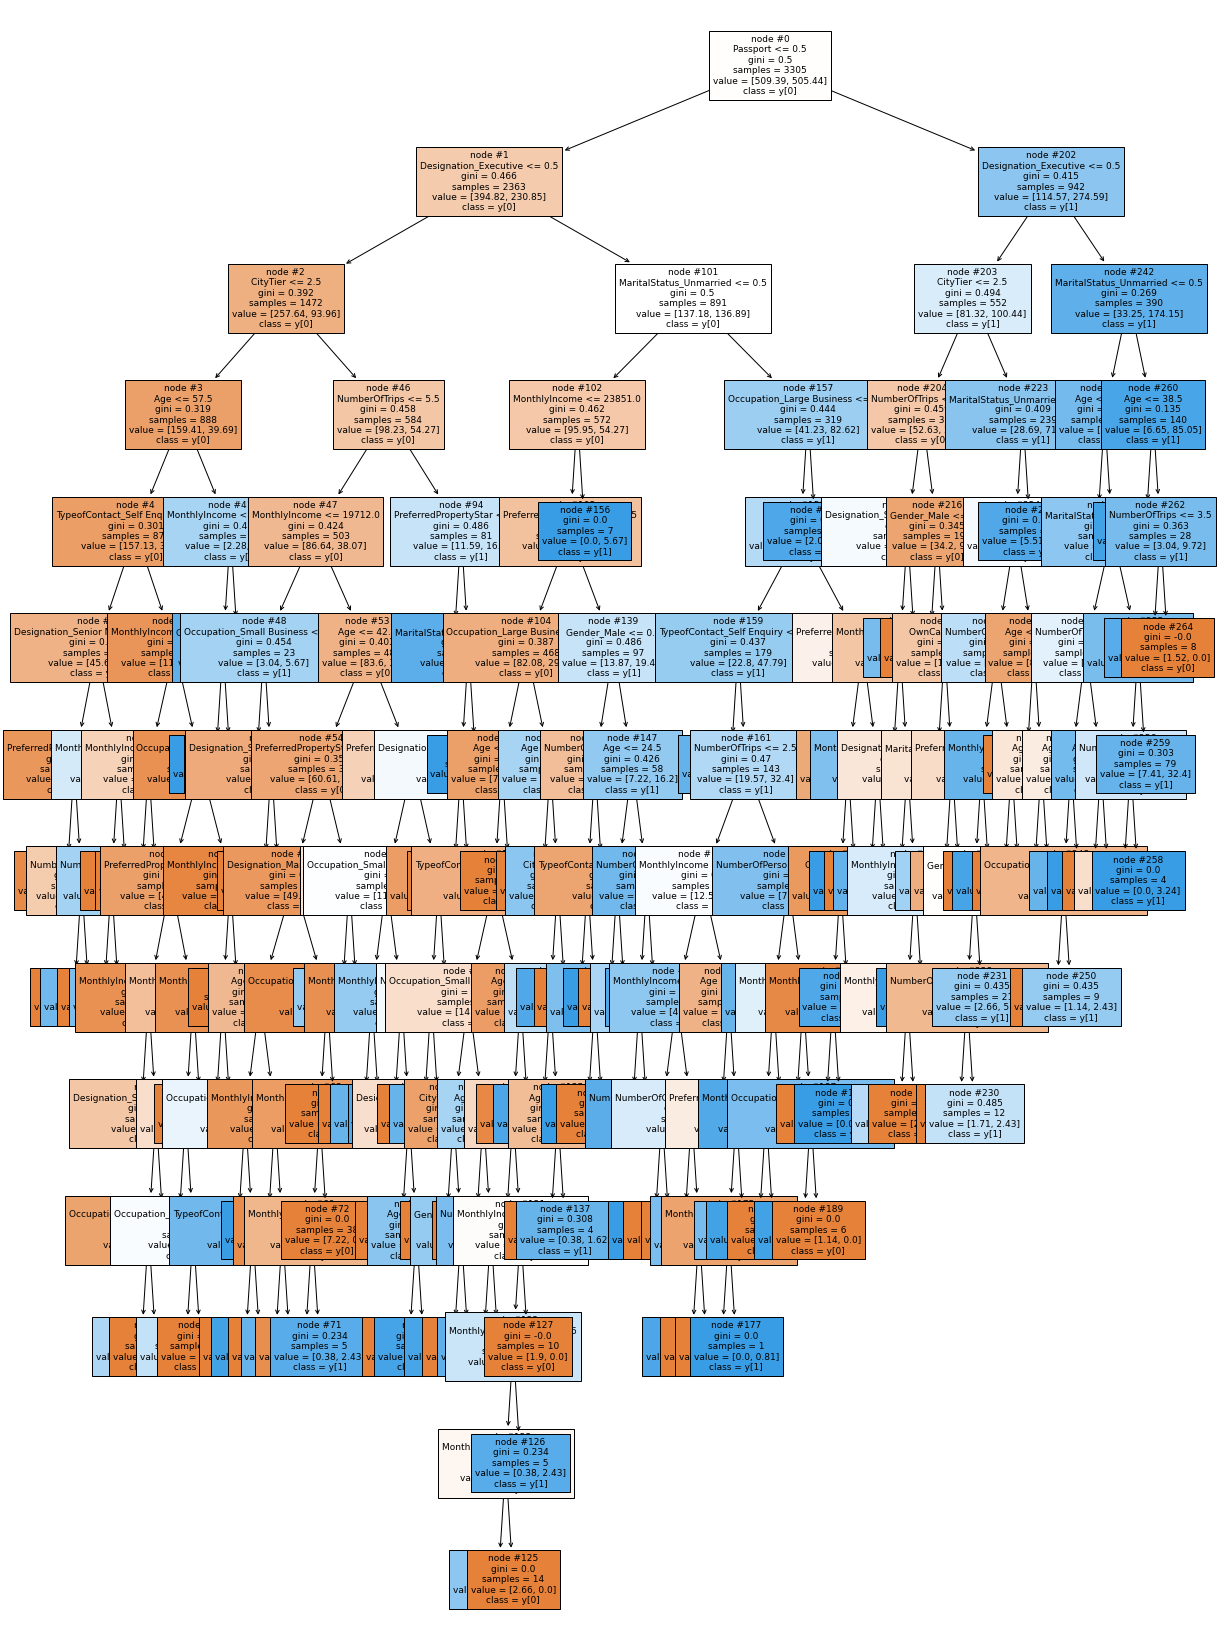

In [199]:
plt.figure(figsize=(20, 30))

out = tree.plot_tree(
    dt_pruned,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=True,
    class_names=True,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

## Model performance summary

**Bagging**

* Bagging classifier is overfitting the training set.
* Performance was not much improved after tuning.
* The test Recall of tuned Bagging classifier is about 0.580524.
    
    
**Random Forest**

* Random Forest classifier is overfitting the training set.
* When class weight was applied, the performance was rather decreased, and the performance was improved through hyperparameter tuning.
* The test Recall of tuned Random Forest classifier is 0.595506.
    
    
**Decision Tree**

* Decision Tree classifier is overfitting the training set, but could reduce overfitting after pruning.
* The performance was rather decreased after hyperparameter tuning.
* Accuracy and Precision were reduced through pruning, but the test Recall could be significantly improved.
* The test Recall of pruned Decisoin Tree classifier is 0.842697.
    
    
**AdaBoost**

* AdaBoost classifier is not overfitting the training set, but it became overfitting after hyperparameter tuning.
* The test Recall could be improved the most without sacrificing Accuracy and Precision through hyperparameter tuning, but improved Recall was not high enough.
* The test Recall of tuned AdaBoost classifier is 0.520599.
    
    
**Gradient Boost**

* Gradient Boost classifier is not overfitting the training set.
* Performance was not much improved after tuning.
* The test Recall of tuned Gradient Boost classifier is 0.453184, which is the lowest Recall among tuned models.
    
**XGBoost**

* XGBoost classifier is overfitting the training set, but could reduce overfitting after hyperparameter tuning.
* Accuracy and Precision were reduced through hyperparameter tuning, but the test Recall could be improved.
* The test Recall of tuned XGBoost classifier is 0.741573.
    
**Stacking**

* Stacking classifier is overfitting the training set.
* Stacking classifier showed the best overall performance with Accuracy 0.887791 and Recall 0.883895.

## Conclusion

* Customers with executive positions residing in tier 3 cities had the highest rate of package purchases.


* The three most important factors for customers to purchase a package are age, passport status, and income.


* Interestingly, customers who purchased the package showed a tendency to have lower income than customers who did not purchase the package, which was prominent in the "Super Deluxe" package.
This may mean that the package is inexpensive but not satisfactory in configuration.


* After purchasing the package, it was possible to construct a model to predict whether or not to purchase the package, excluding the interaction information.


* Stacking classifier showed the best overall performance with Acuracy 0.887791 and Recall 0.883895.

## Business Recommendations

* It is recommended that the "Visit with us" tries to promote the new product mainly to unmarried 30-something customers with passports, living in tier 3 cities, and executive positions.


* Even if the price of the package is slightly increased, it may be necessary to supplement the configuration a little more.


* Additional data collection is required for the freelance customer group.


* Active followup is required after the pitch and it is okay to hold a long pitch period, but it is recommended to shorten the pitch period for AVP position customers.


* Since many customers are accompanied by children under the age of 5, it is recommended to supplement the convenience for children.